# Stratified LD score regression plotting and exploration
This document will focus on generating plots for the enrichment of mQTL-set heritability enrichment for traits and disorders. I also will delve into the heritability attributable to fetal annotations and similar molecular QTL annotations for comparison.

In [1]:
library(data.table)
library(tidyverse)
library(knitr)
library(kableExtra)
library(IRdisplay)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




## Establishing confidence method and annotations
### mQTL annotation enrichments

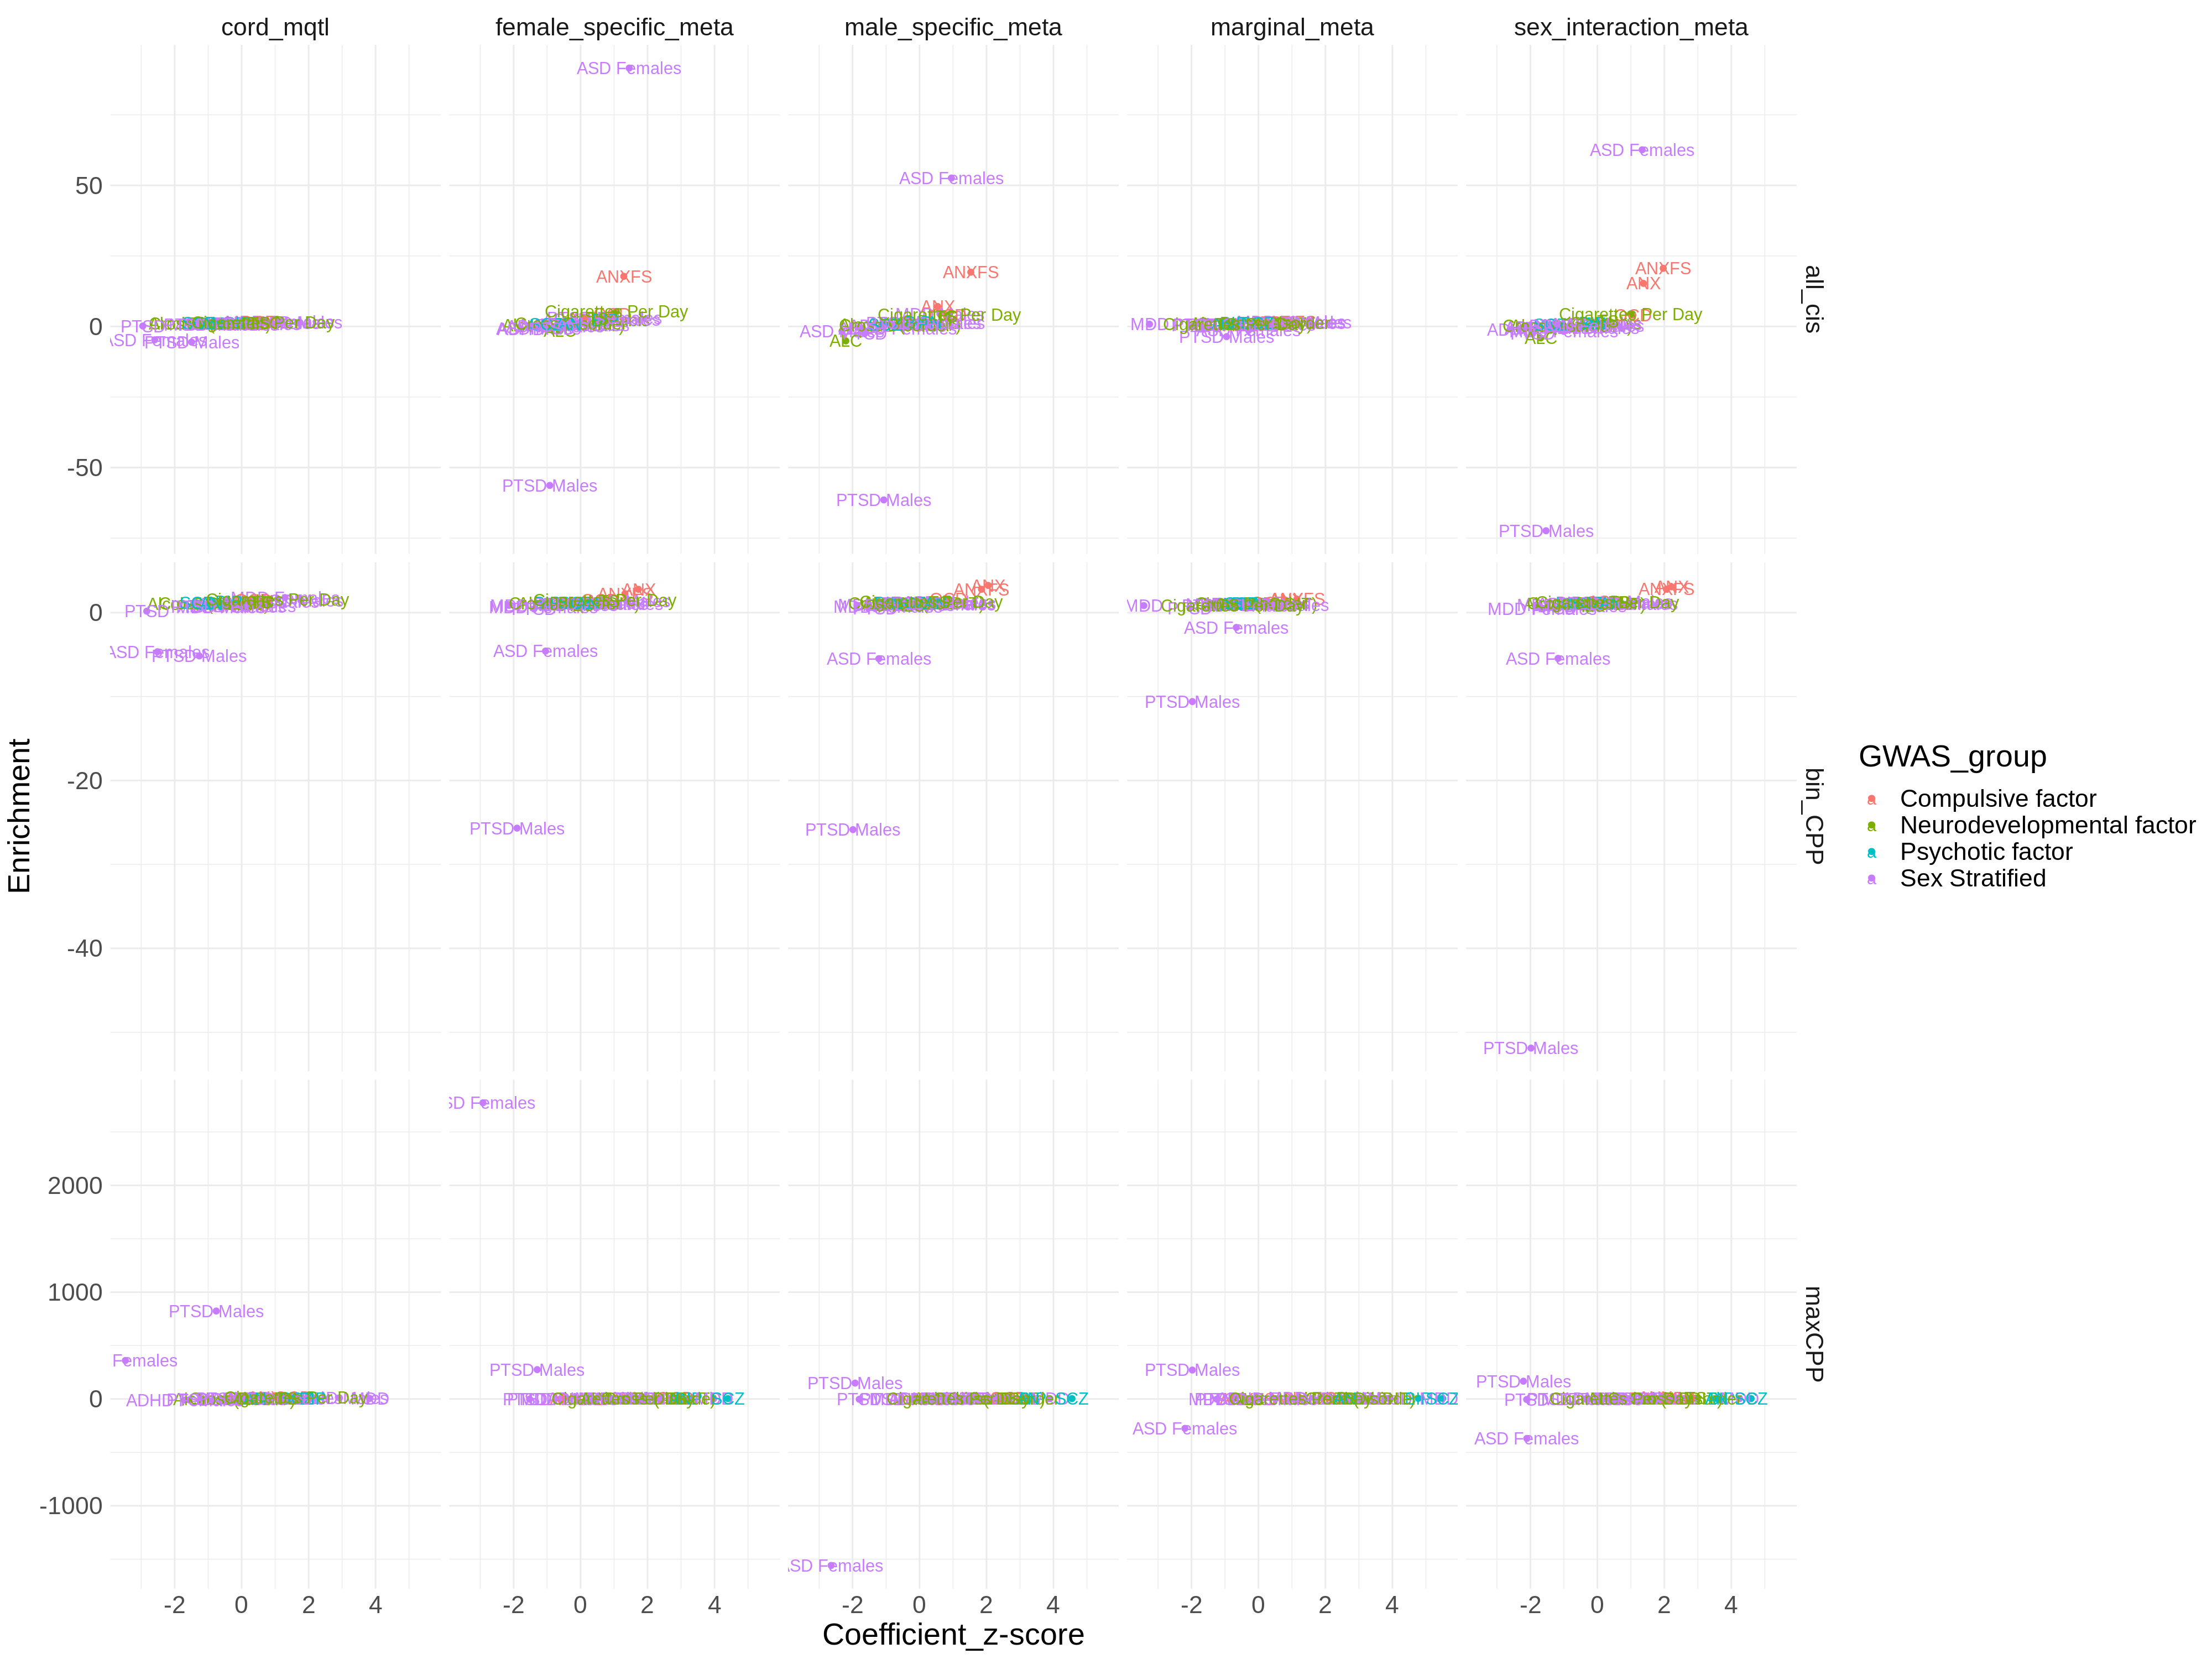

In [2]:
options(repr.plot.width= 20, repr.plot.height= 15, repr.plot.res = 200)
ldsc_data <- fread("../data/ldsc_eur_data.csv")

gwas_sample_sizes <- function(f){
    N <- fread(f,nrows=1)$N
    GWAS <- str_match(f,".*/(.*).sumstats.gz")[2]
    return(data.table(GWAS=GWAS,N=N))
}
part_heritability_results <- function(path,var=1){
    lapply(
          dir(
            path,
            pattern = "[marginal|sex_interaction|cord_mqtl|marginal_meta|sex_interaction_meta|male_specific_meta|female_specific_meta].*.results$",
            full.names = TRUE
          ),
          function(f) {
            labels <- str_match(f, ".*/(marginal|sex_interaction|cord_mqtl|marginal_meta|sex_interaction_meta|male_specific_meta|female_specific_meta)_(all_cis|bin_CPP|maxCPP)_(.*).results")[-c(1)]
            if (any(is.na(labels))) {
              return(data.table())
            } else {
              dt <- fread(f)[var, !"Category"]
              dt[, 
                `:=`(
                  Coefficient_p=pnorm(abs(`Coefficient_z-score`),lower.tail=F)*2,
                  mQTL_group = labels[1],
                  annotation = labels[2],
                  GWAS = labels[3])]
              return(dt)
            }
          }
        )
}


pgc_part_heritability_df <- rbindlist(part_heritability_results("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_pgc_results/"))

pgc_GWAS_key <- c(
    "adhd_jul2017" = "ADHD",
    "pgc_adhd_males" = "ADHD Males",
    "pgc_adhd_females" = "ADHD Females",
    "pts_all_freeze2_overall.results" = "PTSD",
    "pts_all_freeze2_males.results" = "PTSD Males",
    "pts_all_freeze2_females.results" = "PTSD Females",
    "iPSYCH-PGC_ASD_Nov2017" = "ASD",
    "NEW_META_PGC_iPSYCH_ASD_males" = "ASD Males",
    "NEW_META_PGC_iPSYCH_ASD_females" = "ASD Females",
    "PGC_UKB_depression_genome-wide.txt" = "MDD",
    "meta_STDERR_mdd_eur_auto_M1_08_gcOFF_pgc.txt" = "MDD Males",
    "meta_STDERR_mdd_eur_auto_F1_08_gcOFF_pgc.txt" = "MDD Females",
    "ocd_aug2017" = "OCD",
    "anxiety.meta.full.cc.tbl" = "ANX",
    "anxiety.meta.full.fs.tbl" = "ANXFS",
    "pgc_bip_2018" = "BIP",
    "PGC3_SCZ_wave3_public.v2.tsv" = "SCZ",
    "pgcAN2.2019-07.vcf.tsv" = "AN",
    "TS_Oct2018" = "TS",
    "pgc.cross.full.2013-03.txt" = "Cross Disorder",
    "AUDIT_UKB_2018_AJP.txt" = "Alcohol (AUDIT)",
    "pgc_alcdep.eur_unrelated.aug2018_release.txt" = "ALC",
    "Cannabis_ICC_23andmetop_UKB_het.txt" = "Cannabis",
    "tag.cpd.tbl" = "Cigarettes Per Day"
)
compulsive <- c(
    "pgcAN2.2019-07.vcf.tsv" = "AN",
    "ocd_aug2017" = "OCD",
    "TS_Oct2018" = "TS"
)
psychotic <- c(
    "pgc_bip_2018" = "BIP",
    "PGC3_SCZ_wave3_public.v2.tsv" = "SCZ",
    "pgc_alcdep.eur_unrelated.aug2018_release.txt" = "ALC"
)
neurodevelopmental <- c(
    "TS_Oct2018" = "TS",
    "pgc_alcdep.eur_unrelated.aug2018_release.txt" = "ALC",
    "adhd_jul2017" = "ADHD",
    "iPSYCH-PGC_ASD_Nov2017" = "ASD",
    "pts_all_freeze2_overall.results" = "PTSD",
    "PGC_UKB_depression_genome-wide.txt" = "MDD"
)
internalizing <- c(
    "pts_all_freeze2_overall.results" = "PTSD",
    "PGC_UKB_depression_genome-wide.txt" = "MDD",
    "anxiety.meta.full.cc.tbl" = "ANX",
    "anxiety.meta.full.fs.tbl" = "ANXFS"
)
substance_set <- c(
    "pgc_alcdep.eur_unrelated.aug2018_release.txt" = "ALC",
    "Cannabis_ICC_23andmetop_UKB_het.txt" = "Cannabis",
    "tag.cpd.tbl" = "Cigarettes Per Day",
    "AUDIT_UKB_2018_AJP.txt" = "Alcohol (AUDIT)"
)

sex_stratified_set <- c(
    "adhd_jul2017" = "ADHD",
    "pgc_adhd_males" = "ADHD Males",
    "pgc_adhd_females" = "ADHD Females",
    "pts_all_freeze2_overall.results" = "PTSD",
    "pts_all_freeze2_males.results" = "PTSD Males",
    "pts_all_freeze2_females.results" = "PTSD Females",
    "iPSYCH-PGC_ASD_Nov2017" = "ASD",
    "NEW_META_PGC_iPSYCH_ASD_males" = "ASD Males",
    "NEW_META_PGC_iPSYCH_ASD_females" = "ASD Females",
    "PGC_UKB_depression_genome-wide.txt" = "MDD",
    "meta_STDERR_mdd_eur_auto_M1_08_gcOFF_pgc.txt" = "MDD Males",
    "meta_STDERR_mdd_eur_auto_F1_08_gcOFF_pgc.txt" = "MDD Females"
)
pgc_part_heritability_df <- pgc_part_heritability_df %>% mutate(
        significant_coef = Coefficient_p < 0.05, 
        significant_enrich = Enrichment_p < 0.05,
        GWAS = recode(GWAS, !!!pgc_GWAS_key)
    ) %>%
    mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key))
plot_coef <- function(plot_df){
    p <- ggplot(
        plot_df,
        aes(
            x=GWAS,
            y=Coefficient,
            fill=mQTL_group,
            ymin=Coefficient-Coefficient_std_error,
            ymax=Coefficient+Coefficient_std_error,
            color = significant_coef
        )
    ) + 
    geom_bar(position="dodge",stat="identity")+
    geom_errorbar(position="dodge")+
    coord_flip() + 
    theme_minimal() +
    theme(axis.text.x=element_text(angle = 90,hjust=1,vjust=1), text=element_text(size=20))+
    scale_color_manual(values=c("black","red"))
    print(p)
}
plot_enrich <- function(plot_df){
    p <- ggplot(
        plot_df,
        aes(
            x=GWAS,
            y=Enrichment,
            fill=mQTL_group,
            ymin=Enrichment-Enrichment_std_error,
            ymax=Enrichment+Enrichment_std_error,
            color = significant_enrich
        )
    ) + 
    geom_bar(position="dodge",stat="identity")+
    geom_errorbar(position="dodge")+
    coord_flip(ylim=c(0,max(plot_df$Enrichment)+1)) + 
    theme_minimal() +
    theme(axis.text.x=element_text(angle = 90,hjust=1,vjust=1), text=element_text(size=20))+
    scale_color_manual(values=c("black","red"))+
    scale_fill_manual(values=c("male_specific_meta"="dodgerblue","female_specific_meta"="lightpink","cord_mqtl"="darkred","marginal_meta"="lightgreen","sex_interaction_meta"="purple"))
    print(p)
}

gwas_groups <- c(
        rep("Sex Stratified", length(sex_stratified_set)),
        rep("Compulsive factor", length(compulsive)),
        rep("Psychotic factor", length(psychotic)),
        rep("Neurodevelopmental factor", length(neurodevelopmental)),
        rep("Internalizing factor", length(internalizing))
    )
names(gwas_groups) <- c(
    names(sex_stratified_set),
    names(compulsive),
    names(psychotic),
    names(neurodevelopmental),
    names(internalizing)
)
p4 <- ggplot(
        pgc_part_heritability_df %>%
            mutate(
                GWAS_group=gwas_groups[GWAS],
                GWAS = recode(GWAS, !!!pgc_GWAS_key)
            )%>%
            filter(!is.na(GWAS_group)) %>%
            mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key)),
        aes(
            x=`Coefficient_z-score`,
            y=Enrichment,
            color=GWAS_group
        )
    ) + 
    geom_point() +
    geom_text(aes(label=GWAS)) +
    facet_grid(annotation~mQTL_group,scales="free_y")+
    theme_minimal() +
    theme(text=element_text(size=20))
print(p4)

## Checking trait heritability estimates
Computed with EUR LD scores and European GWAS summary statistics.

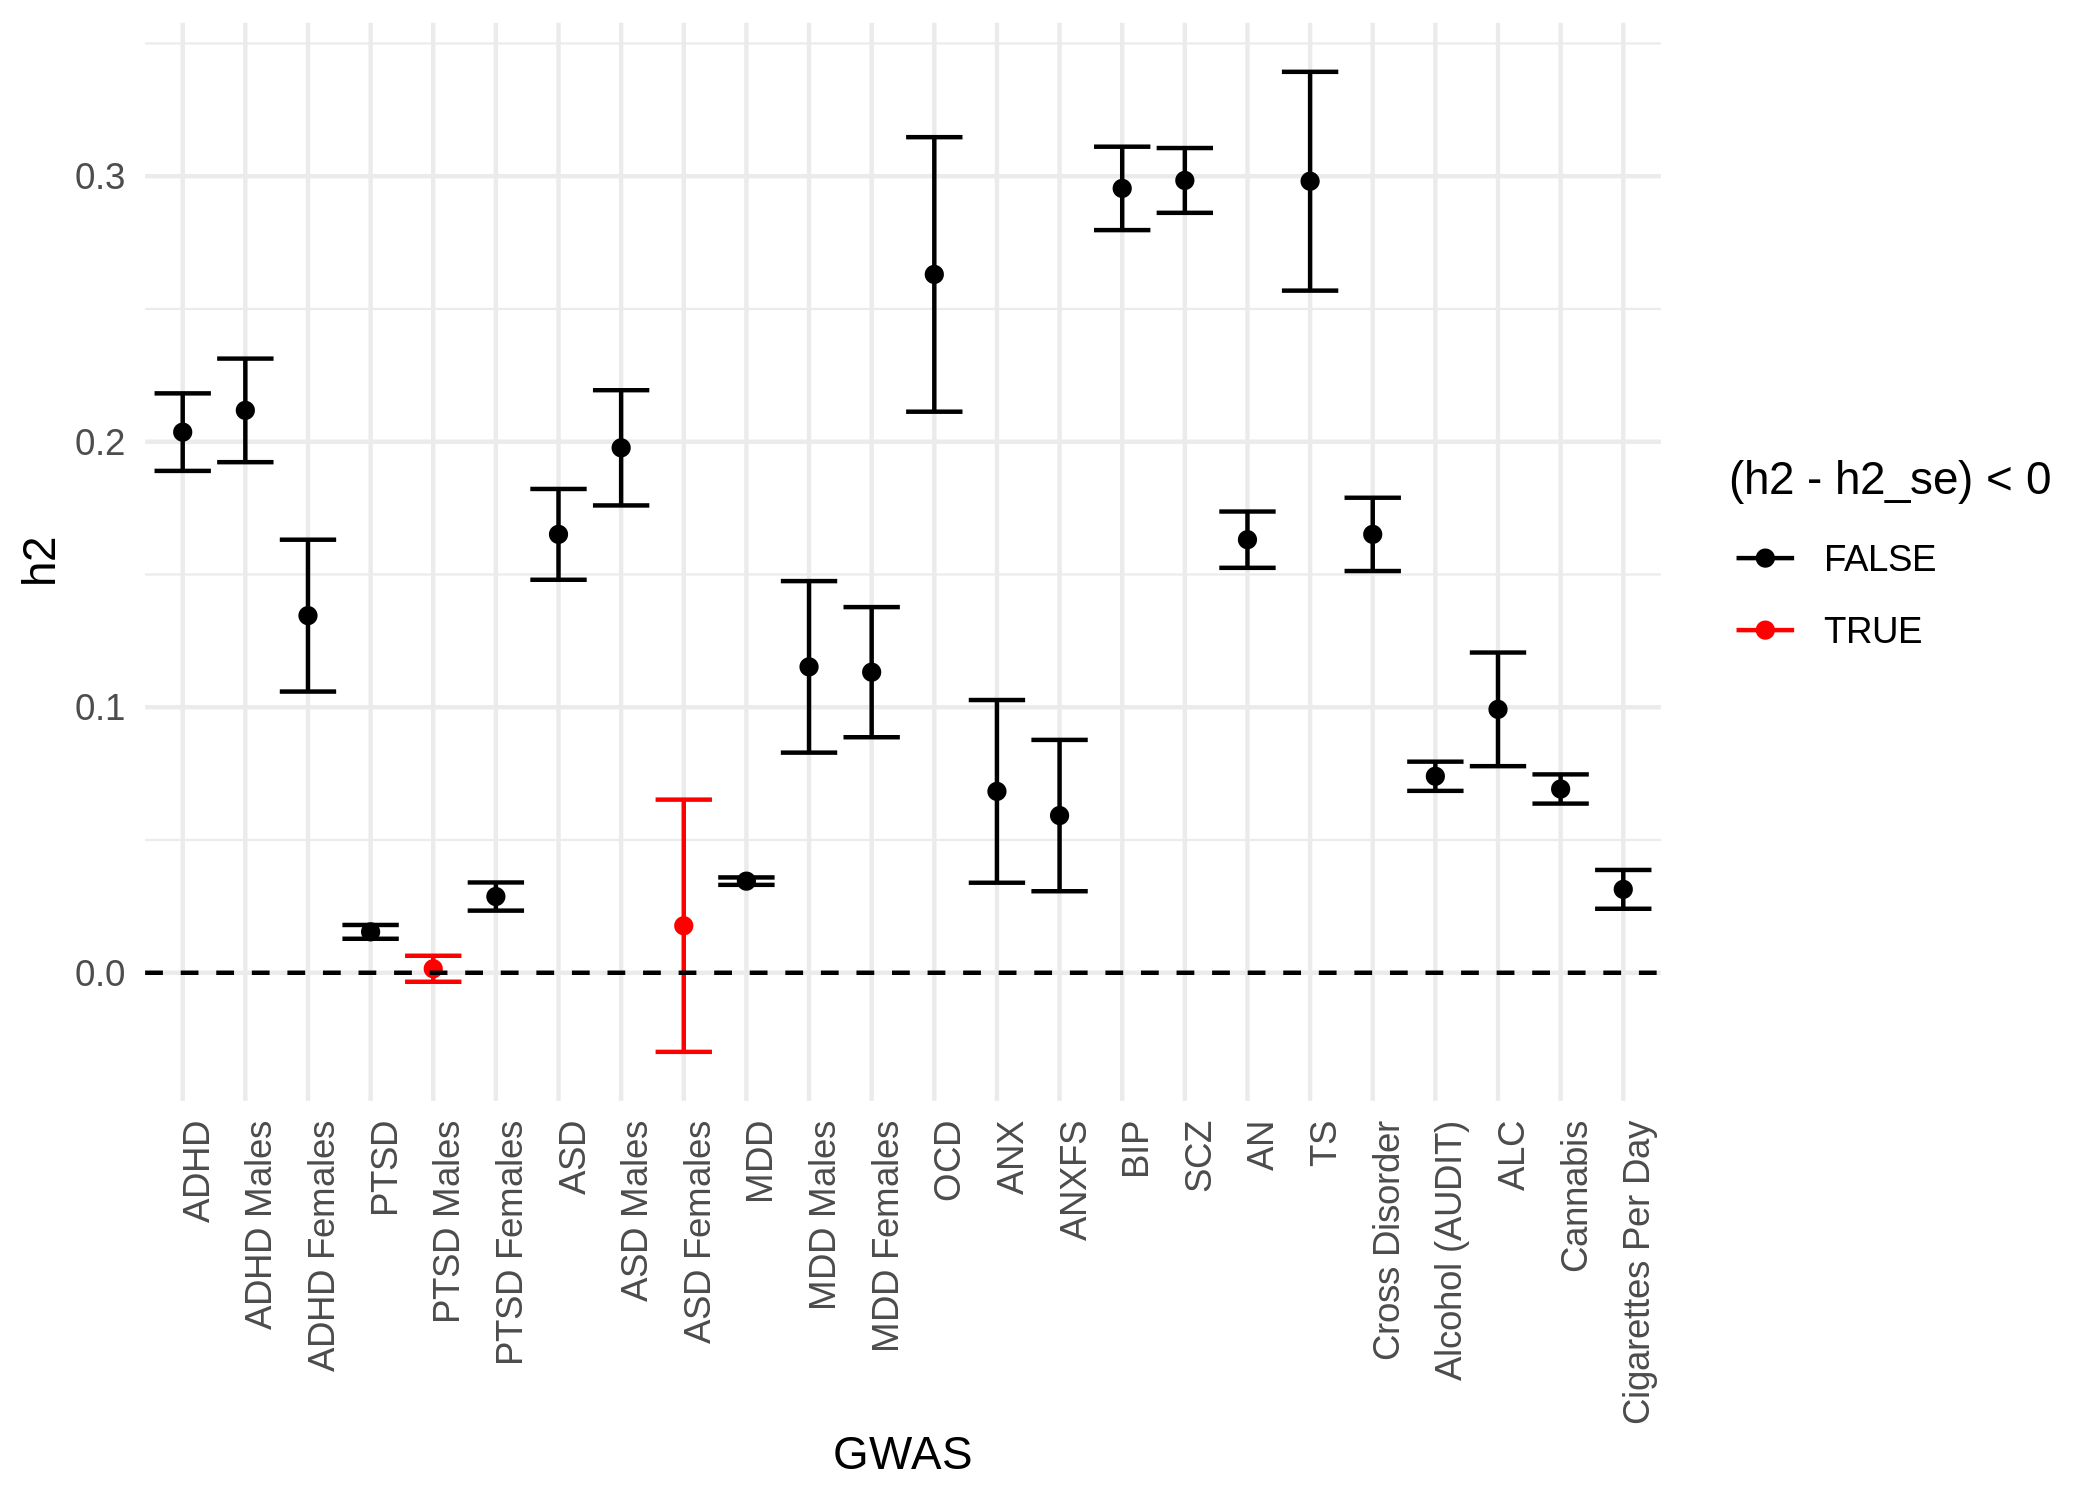

In [11]:
options(repr.plot.width= 7, repr.plot.height= 5, repr.plot.res = 300)
ldsc_data %>% 
    filter(annotation == "all_cis",mQTL_group == "marginal_meta",GWAS %in% names(pgc_GWAS_key)) %>% 
    mutate(
        GWAS = recode(GWAS, !!!pgc_GWAS_key)
    ) %>%
    mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key)) %>% 
    ggplot(aes(GWAS,h2,ymin=h2-h2_se,ymax=h2+h2_se, color= (h2-h2_se) < 0)) + 
        geom_point() +
        geom_errorbar() +
        geom_hline(yintercept = 0, linetype="dashed")+
        theme_minimal() +
        scale_color_manual(values=c("black","red")) +
        theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

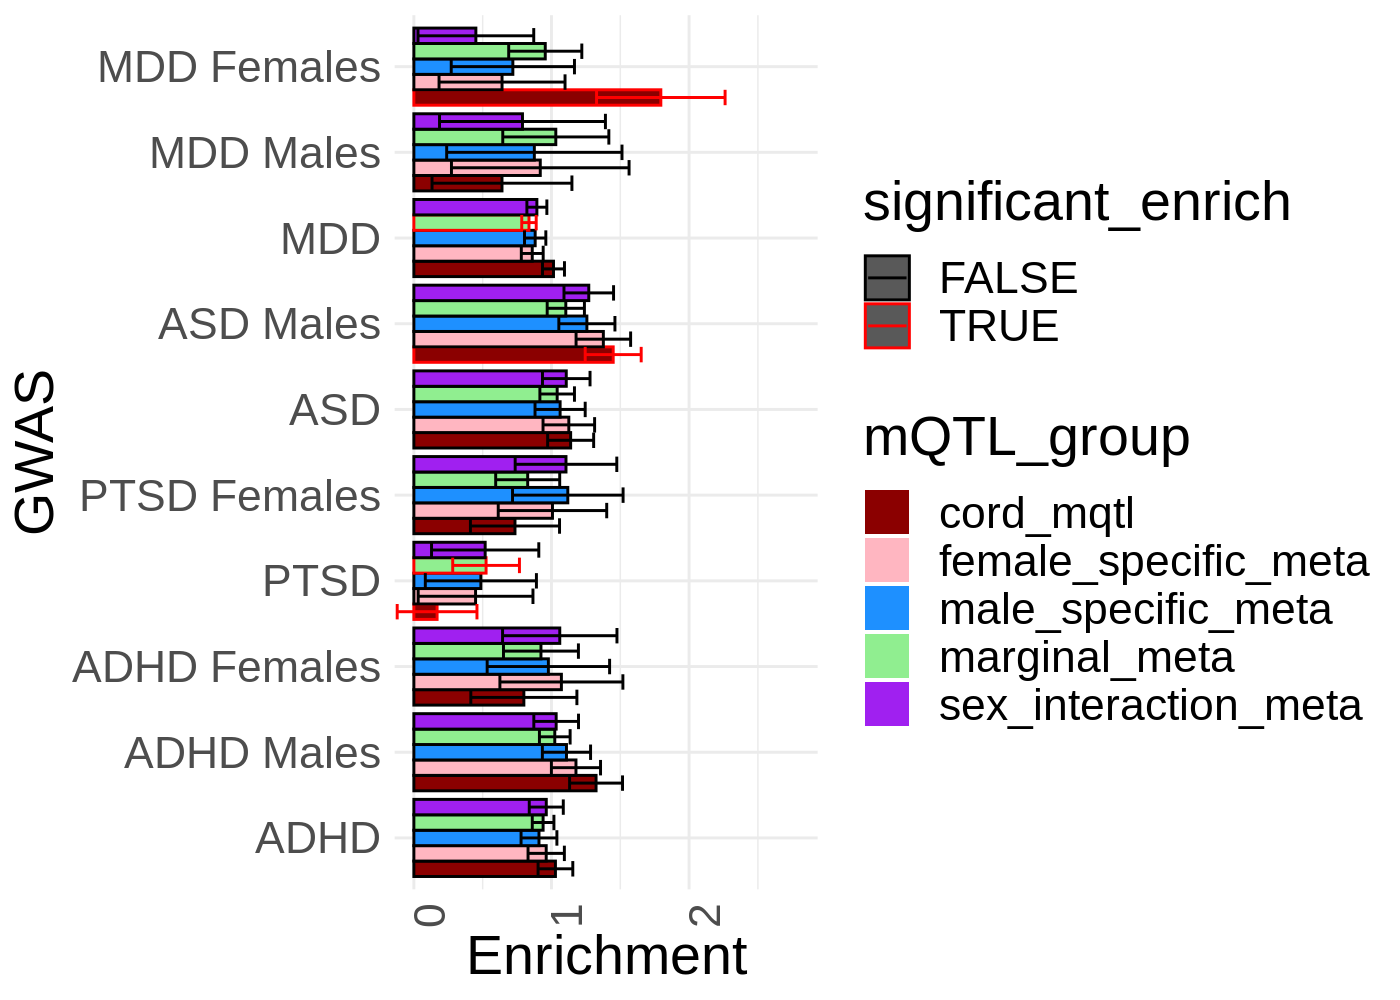

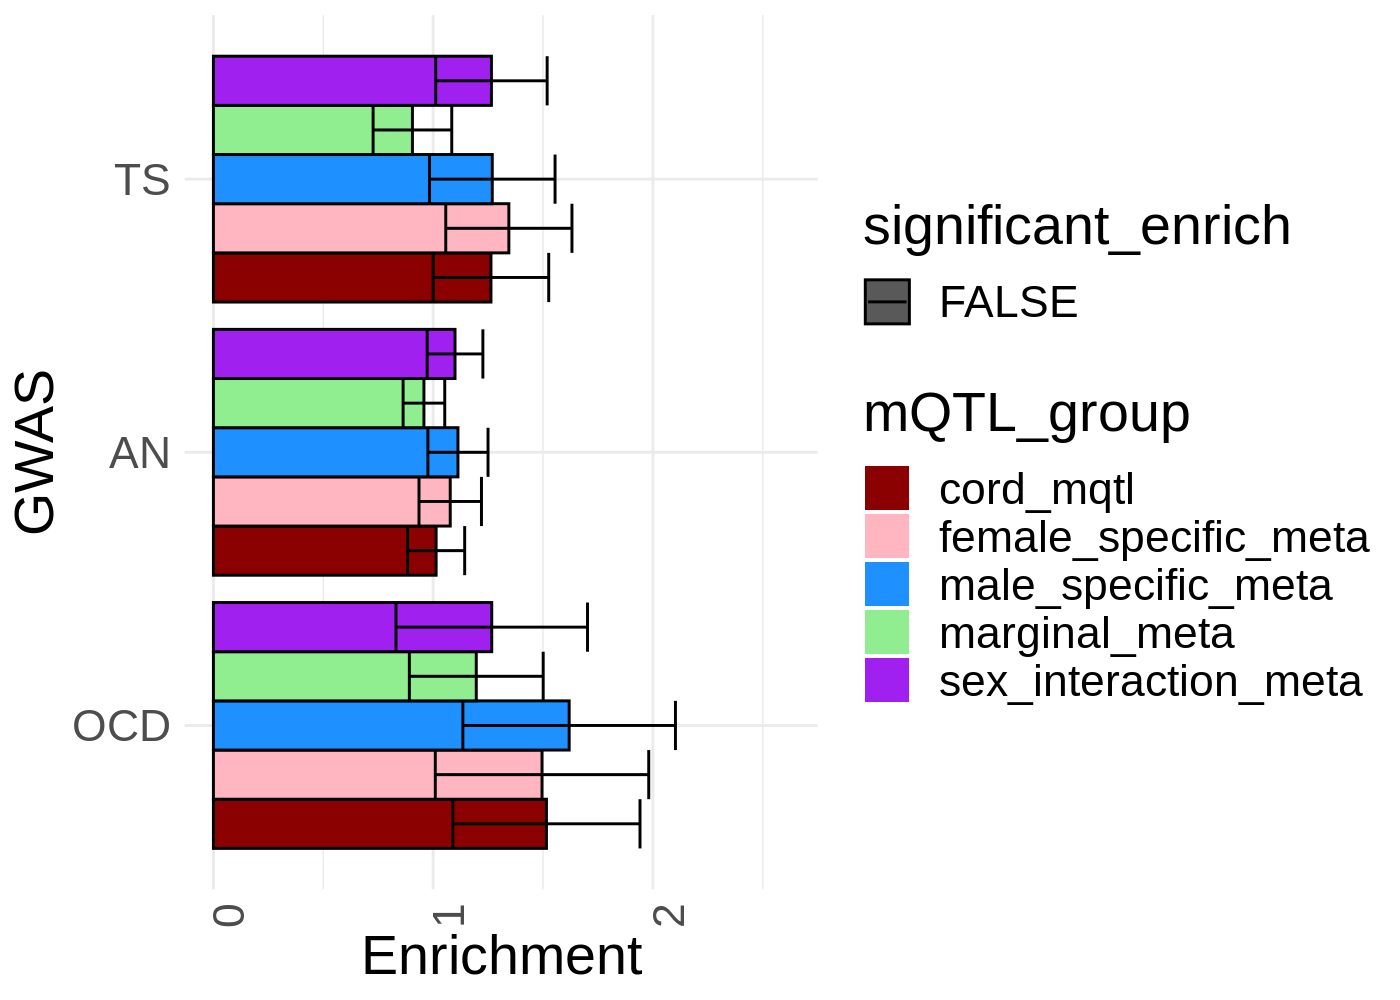

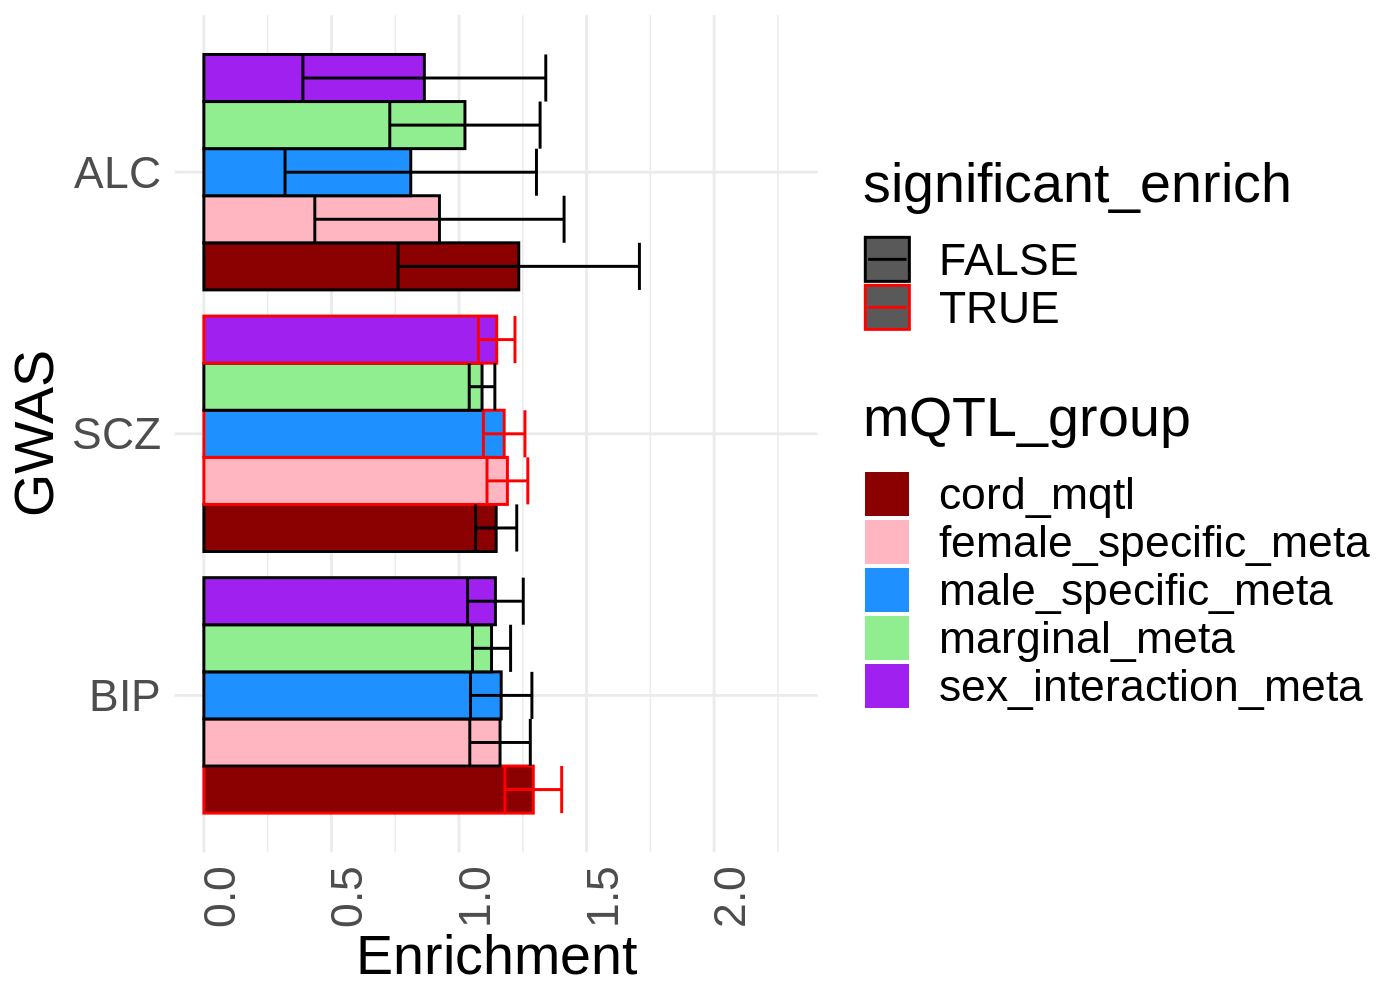

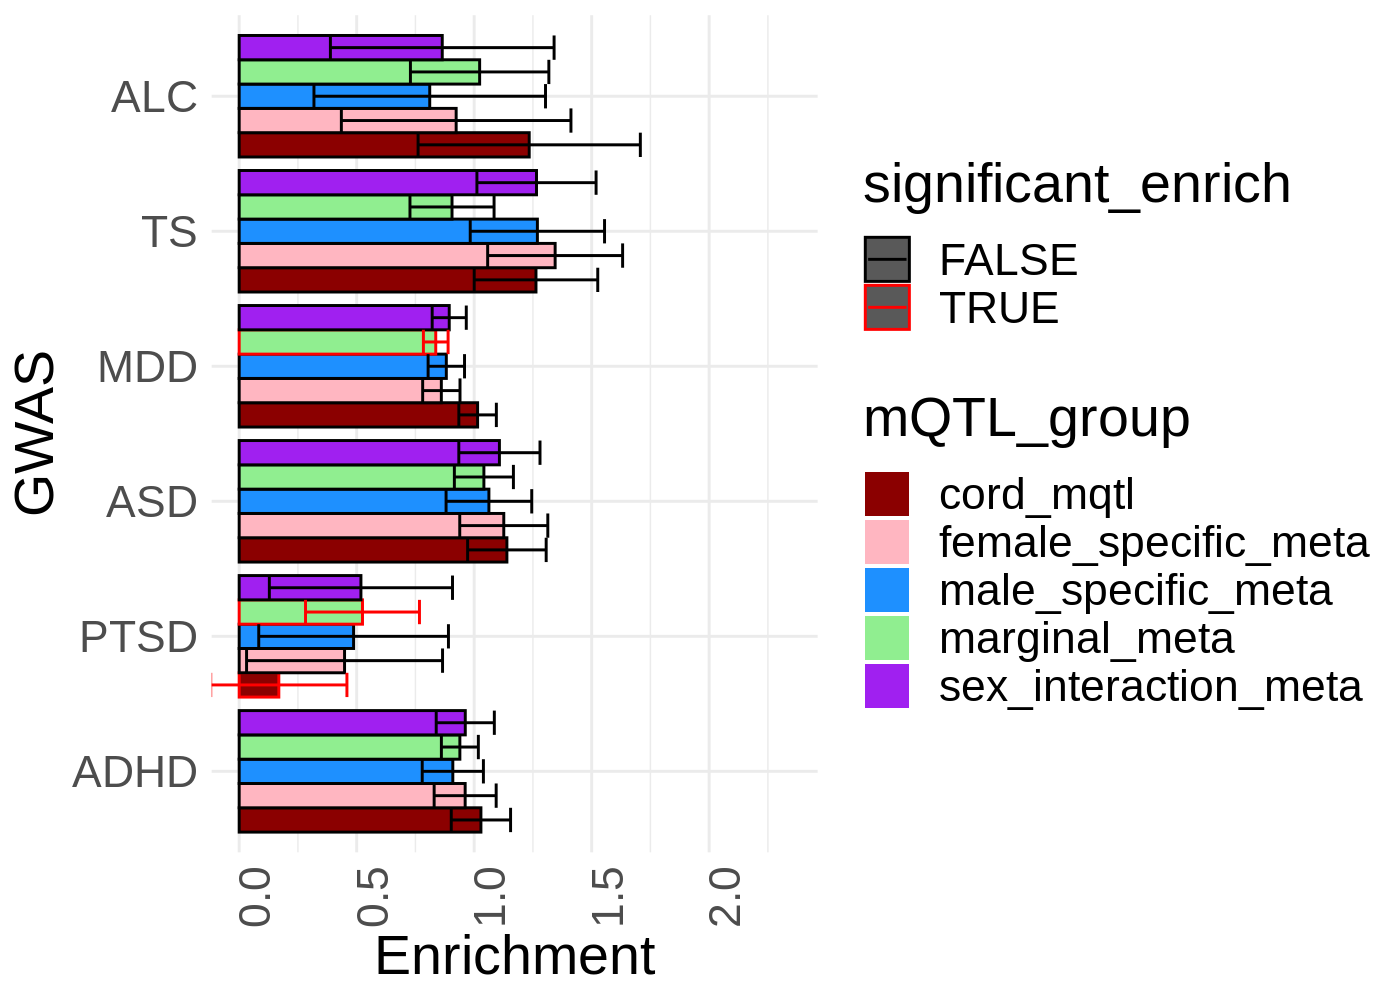

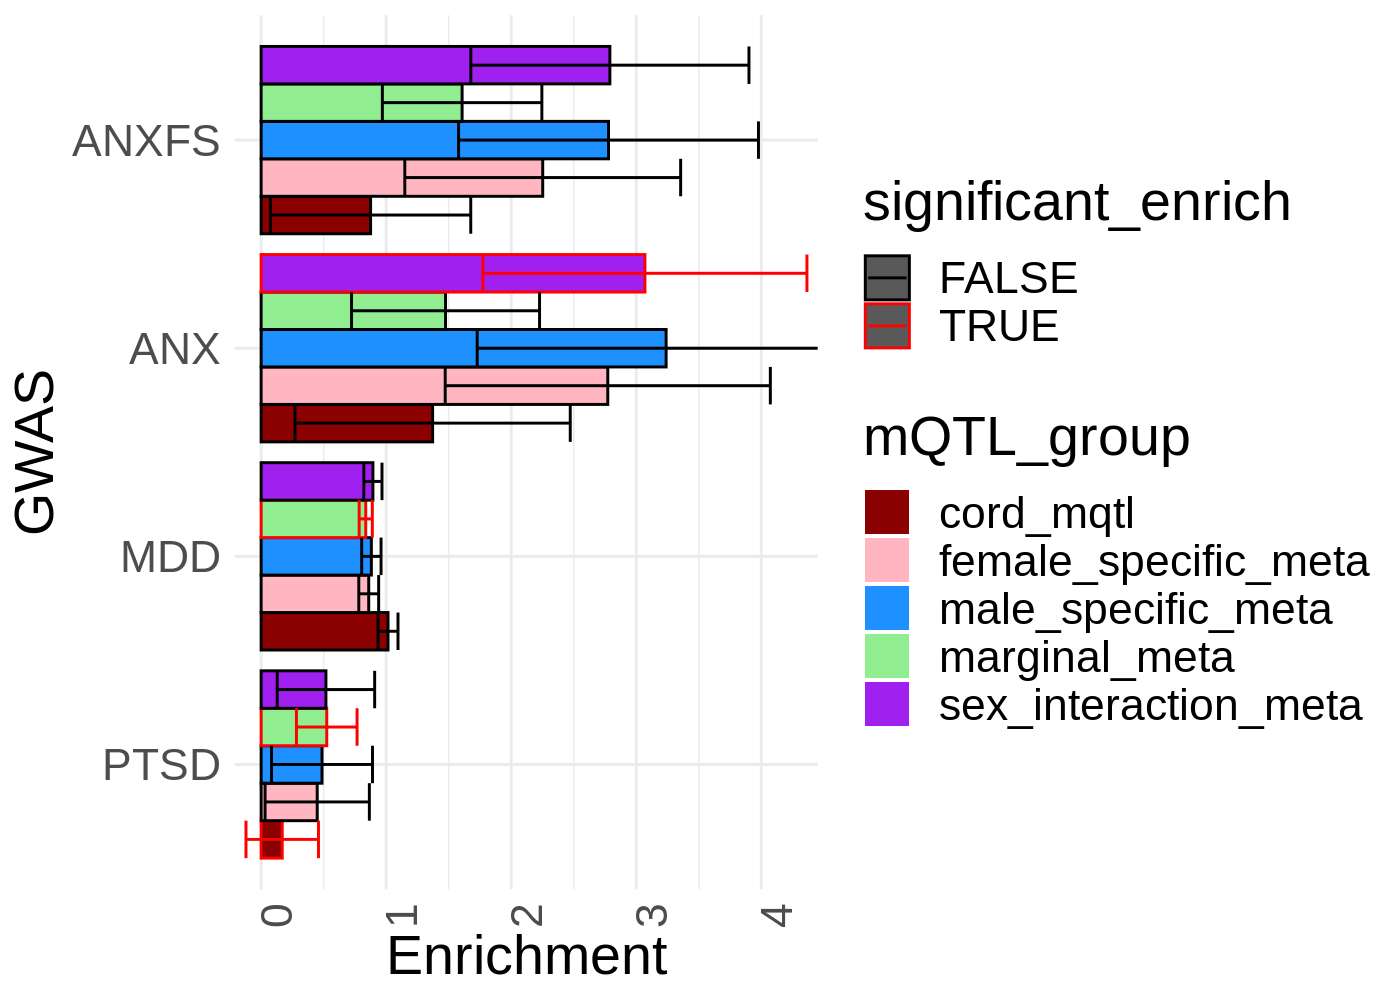

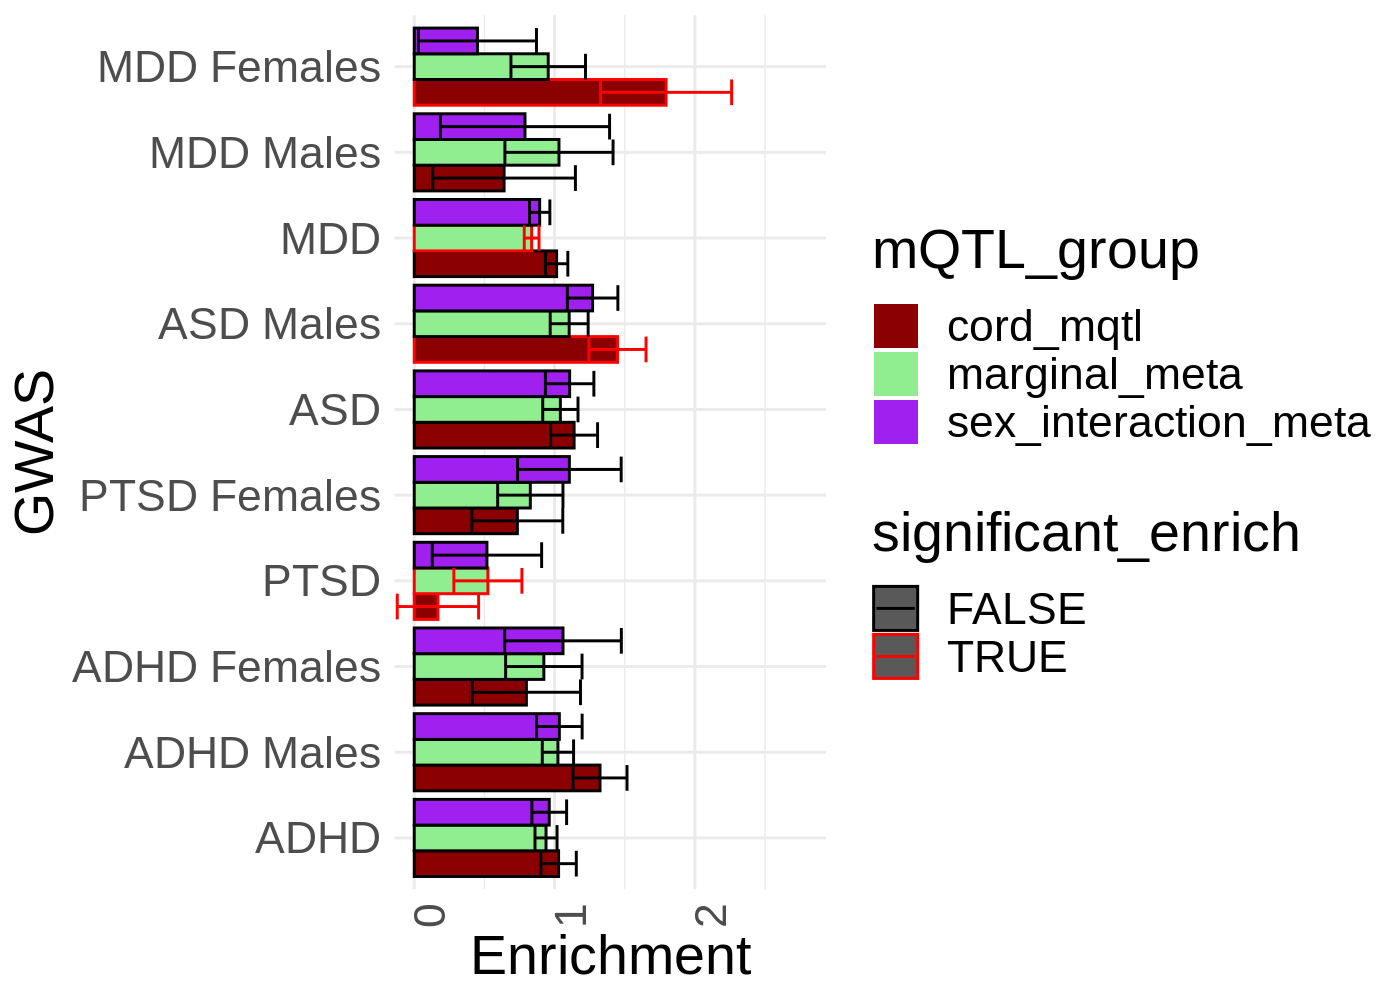

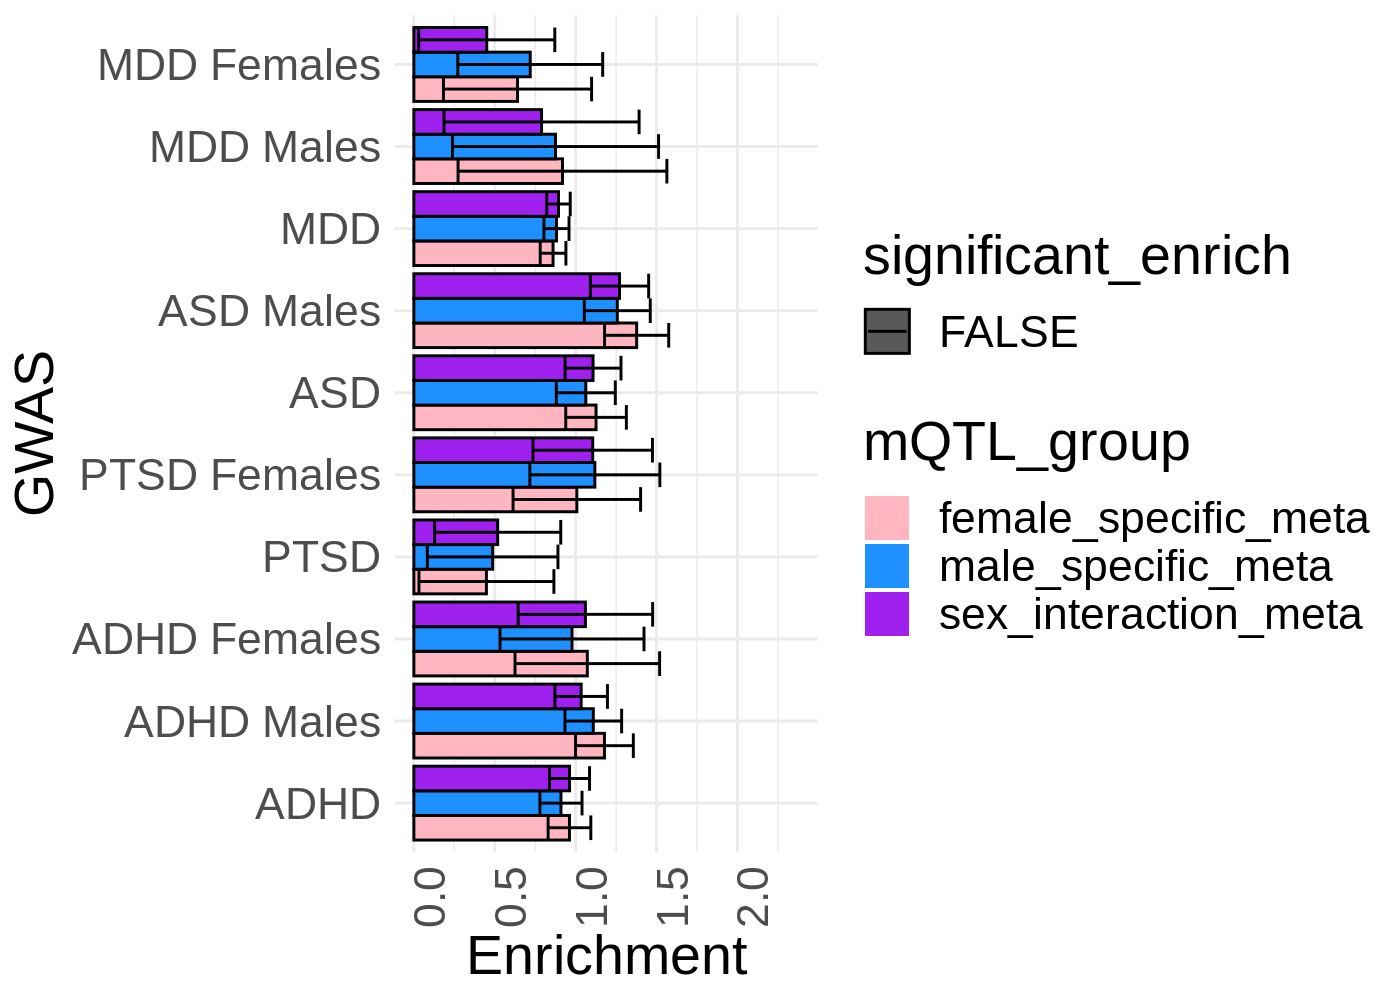

In [4]:
options(repr.plot.width= 7, repr.plot.height= 5, repr.plot.res = 200)
pgc_part_heritability_bin <-  pgc_part_heritability_df %>% filter(annotation == "bin_CPP")
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% sex_stratified_set,!GWAS %in% c("PTSD Males","ASD Females")))
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% compulsive))
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% psychotic))
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% neurodevelopmental))
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% internalizing))

plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("cord_mqtl","marginal_meta","sex_interaction_meta"),!GWAS %in% c("PTSD Males","ASD Females")))
plot_enrich(pgc_part_heritability_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("male_specific_meta","female_specific_meta","sex_interaction_meta"),!GWAS %in% c("PTSD Males","ASD Females")))

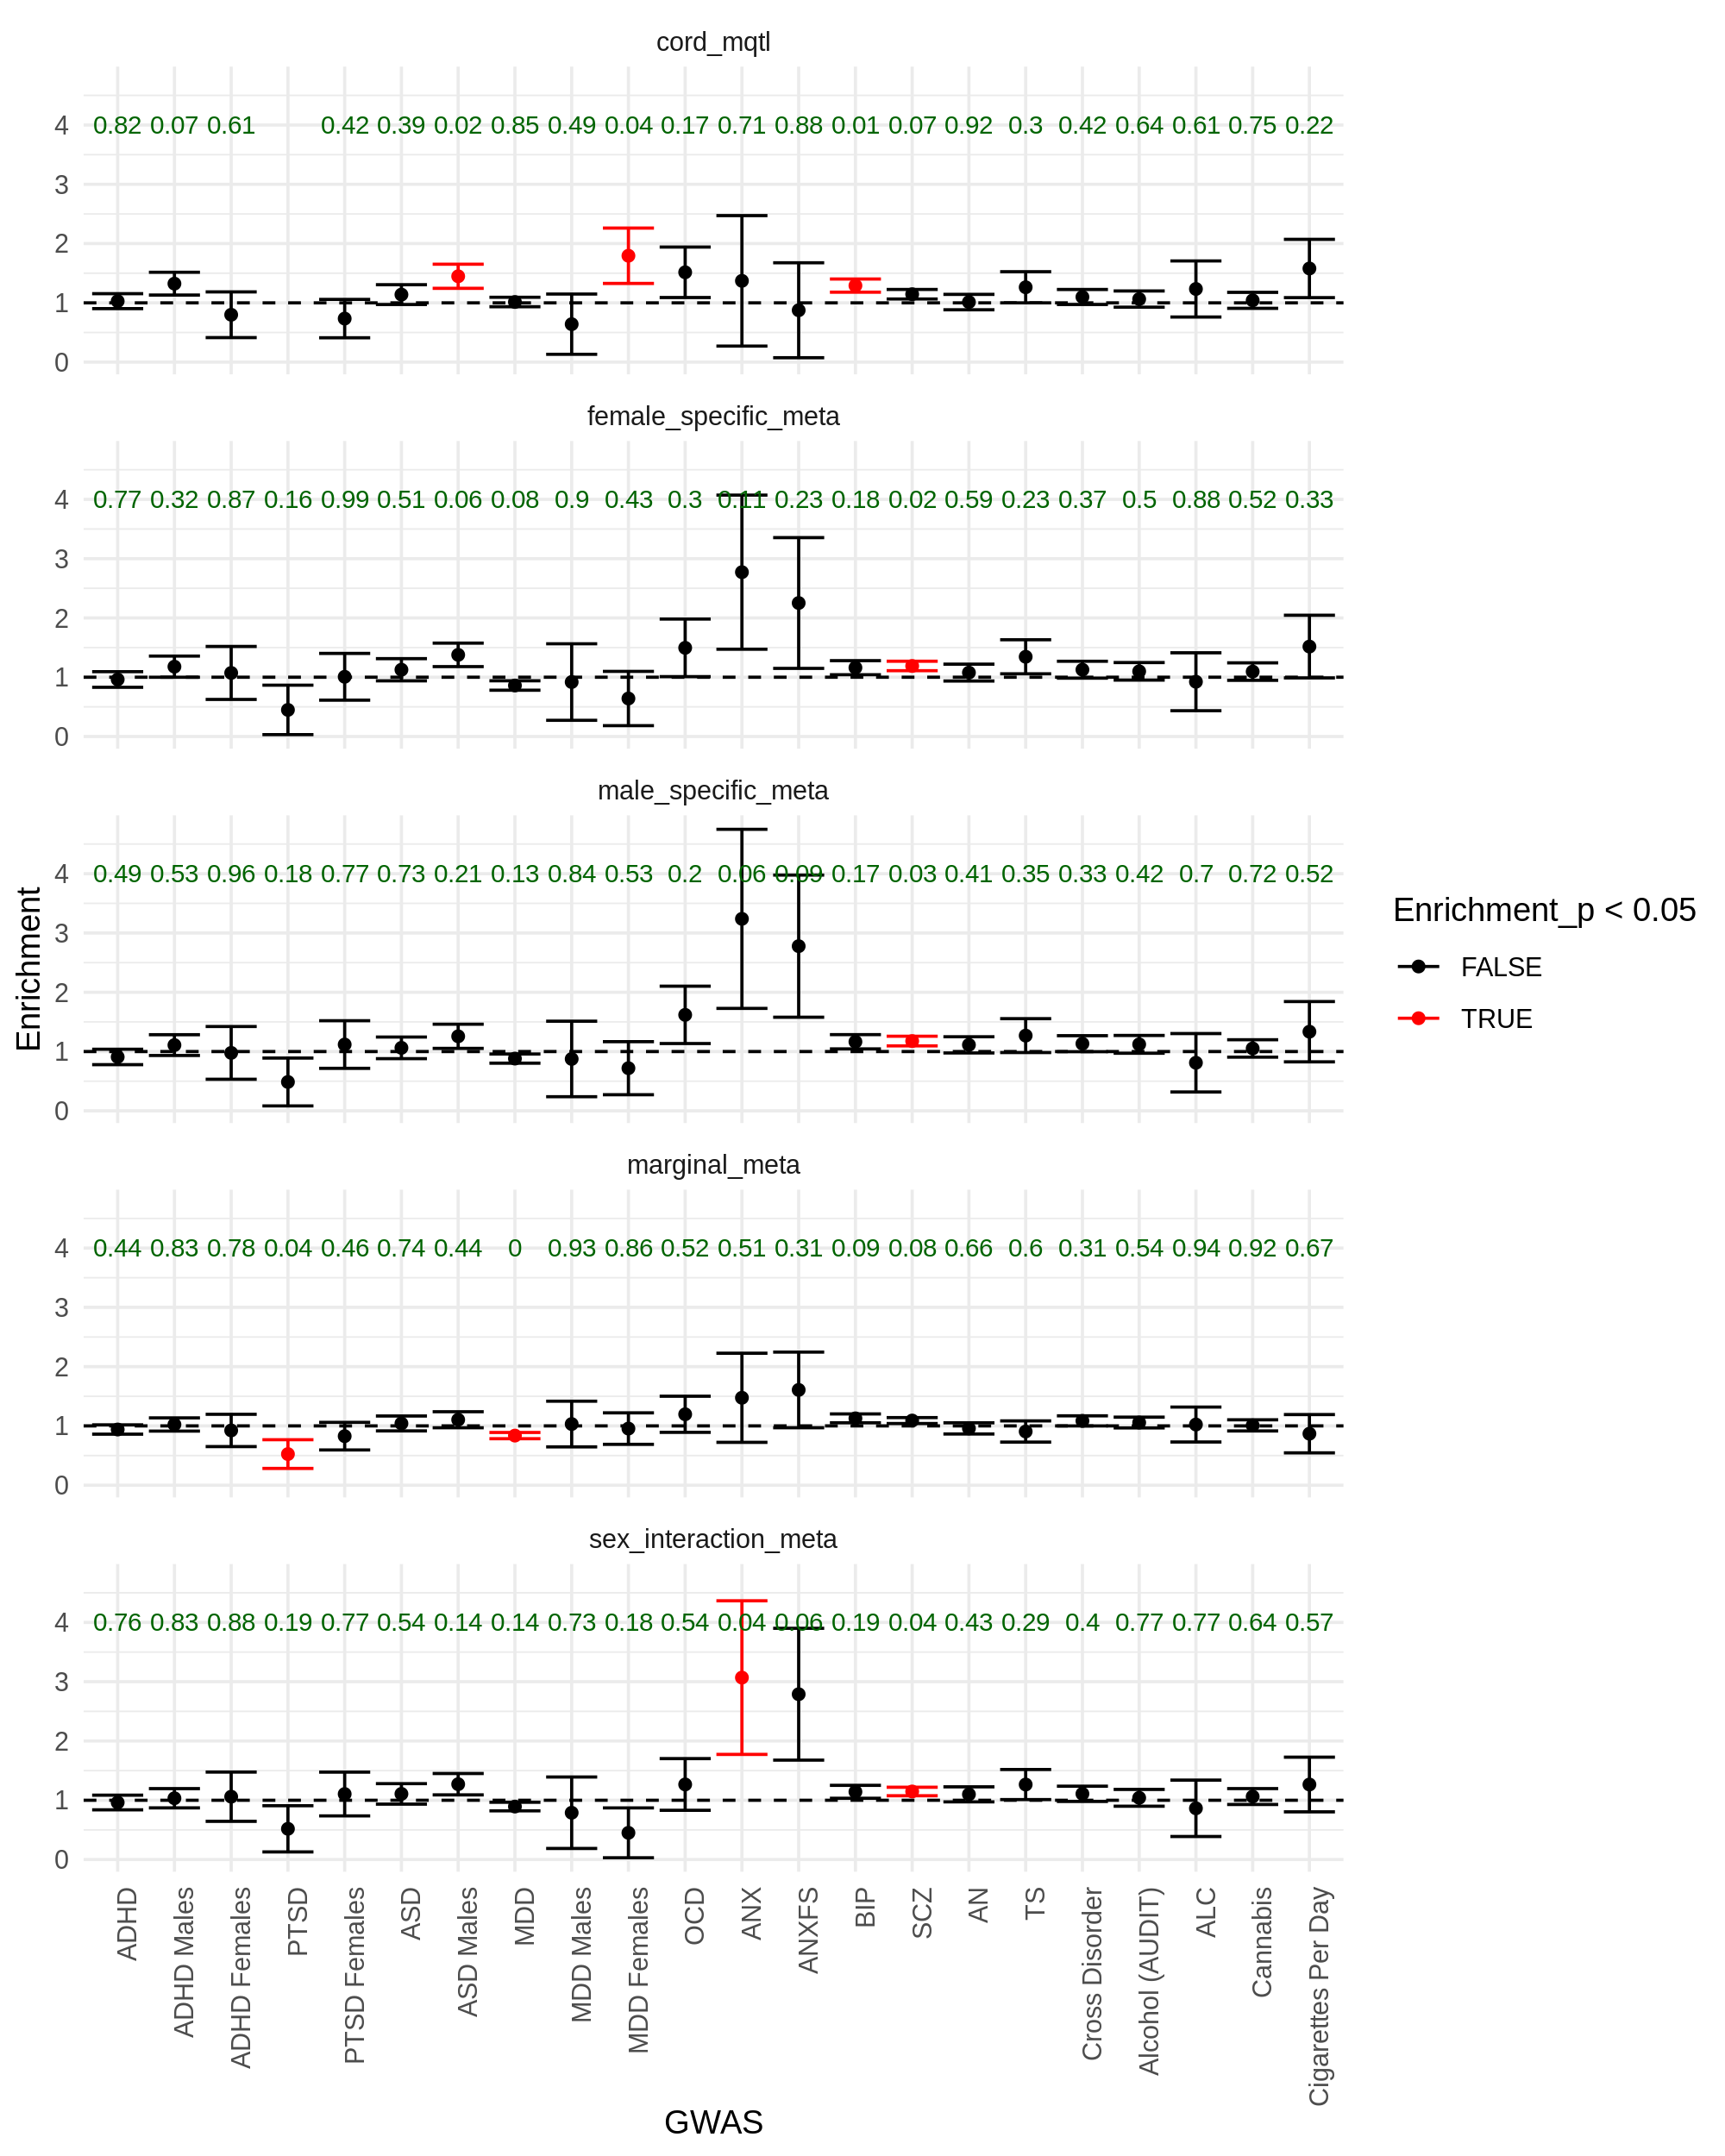

In [13]:
options(repr.plot.width=8,repr.plot.height=10,repr.plot.res=250)
ggplot(pgc_part_heritability_bin %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=3,color="darkgreen",y=4)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

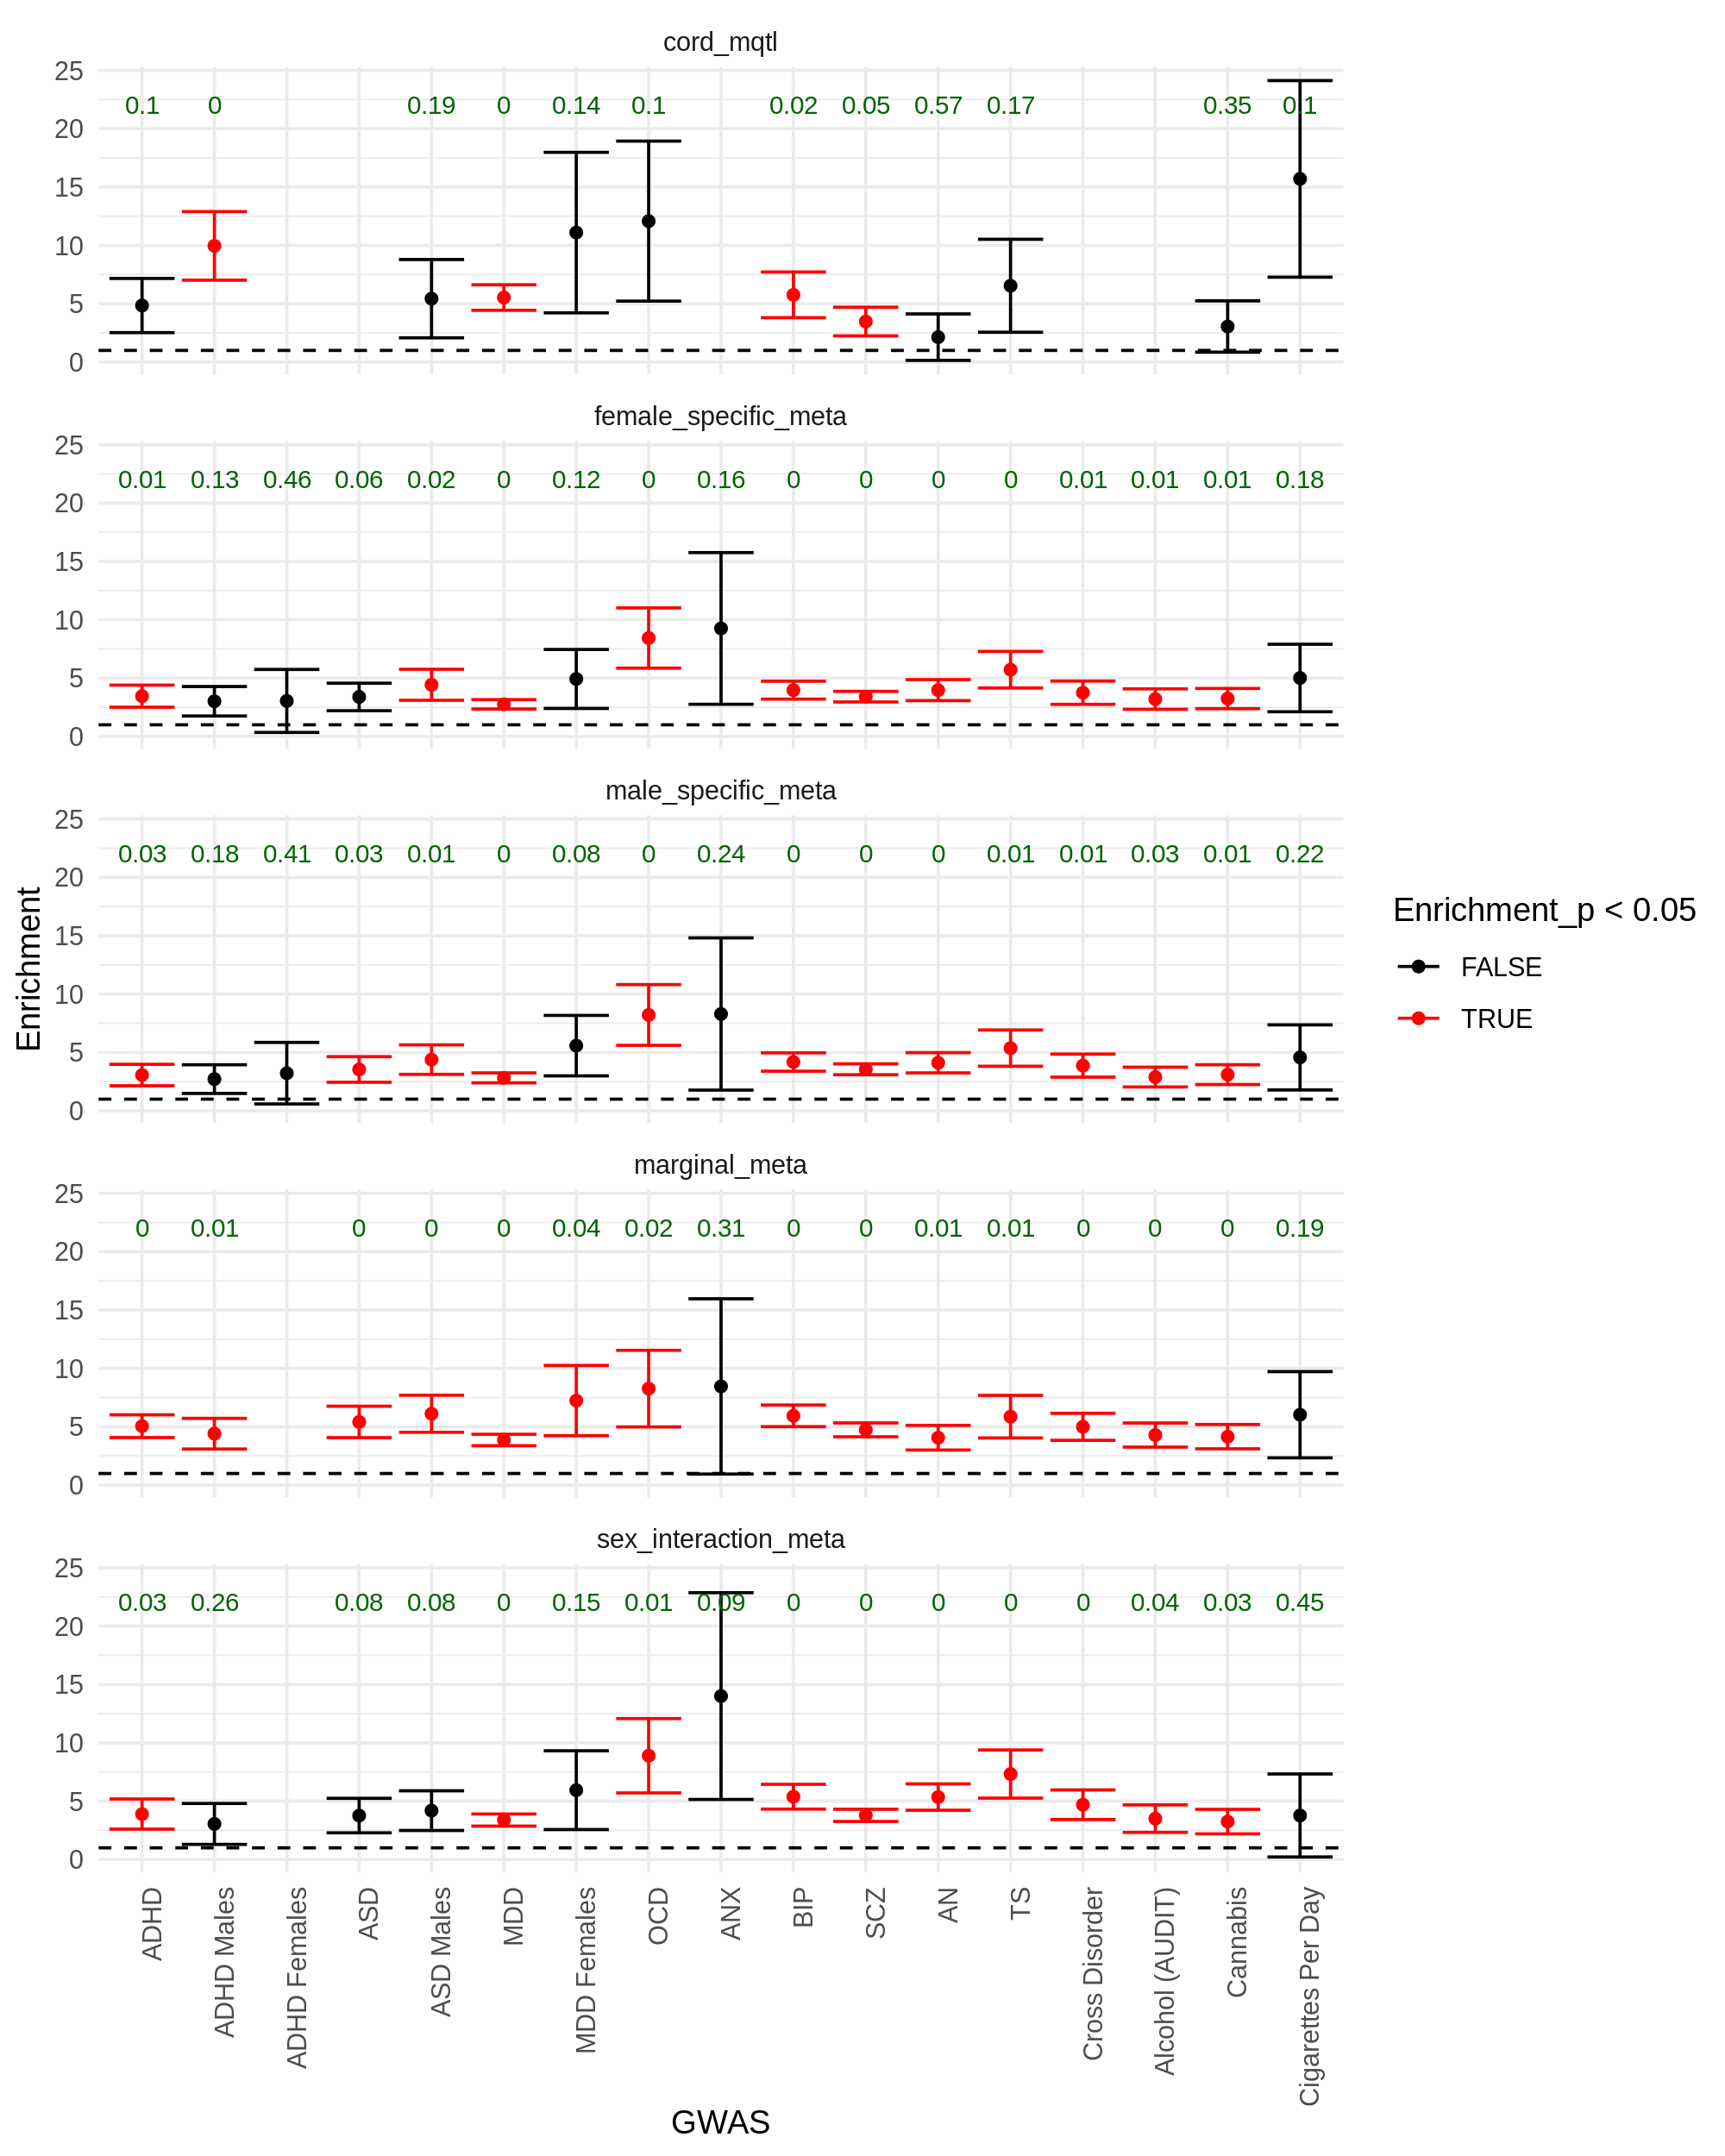

In [14]:
pgc_part_heritability_max <-  pgc_part_heritability_df %>% filter(annotation == "maxCPP")
# plot_enrich(pgc_part_heritability_max %>% filter(GWAS %in% sex_stratified_set, !GWAS %in% c("ASD Females","PTSD Males", "MDD Males", "PTSD Females","PTSD","ADHD Females")))
# plot_enrich(pgc_part_heritability_max %>% filter(GWAS %in% compulsive))
# plot_enrich(pgc_part_heritability_max %>% filter(GWAS %in% psychotic))
# plot_enrich(pgc_part_heritability_max %>% filter(GWAS %in% neurodevelopmental))
# plot_enrich(pgc_part_heritability_max %>% filter(GWAS %in% internalizing))

ggplot(pgc_part_heritability_max %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=3,color="darkgreen",y=22)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

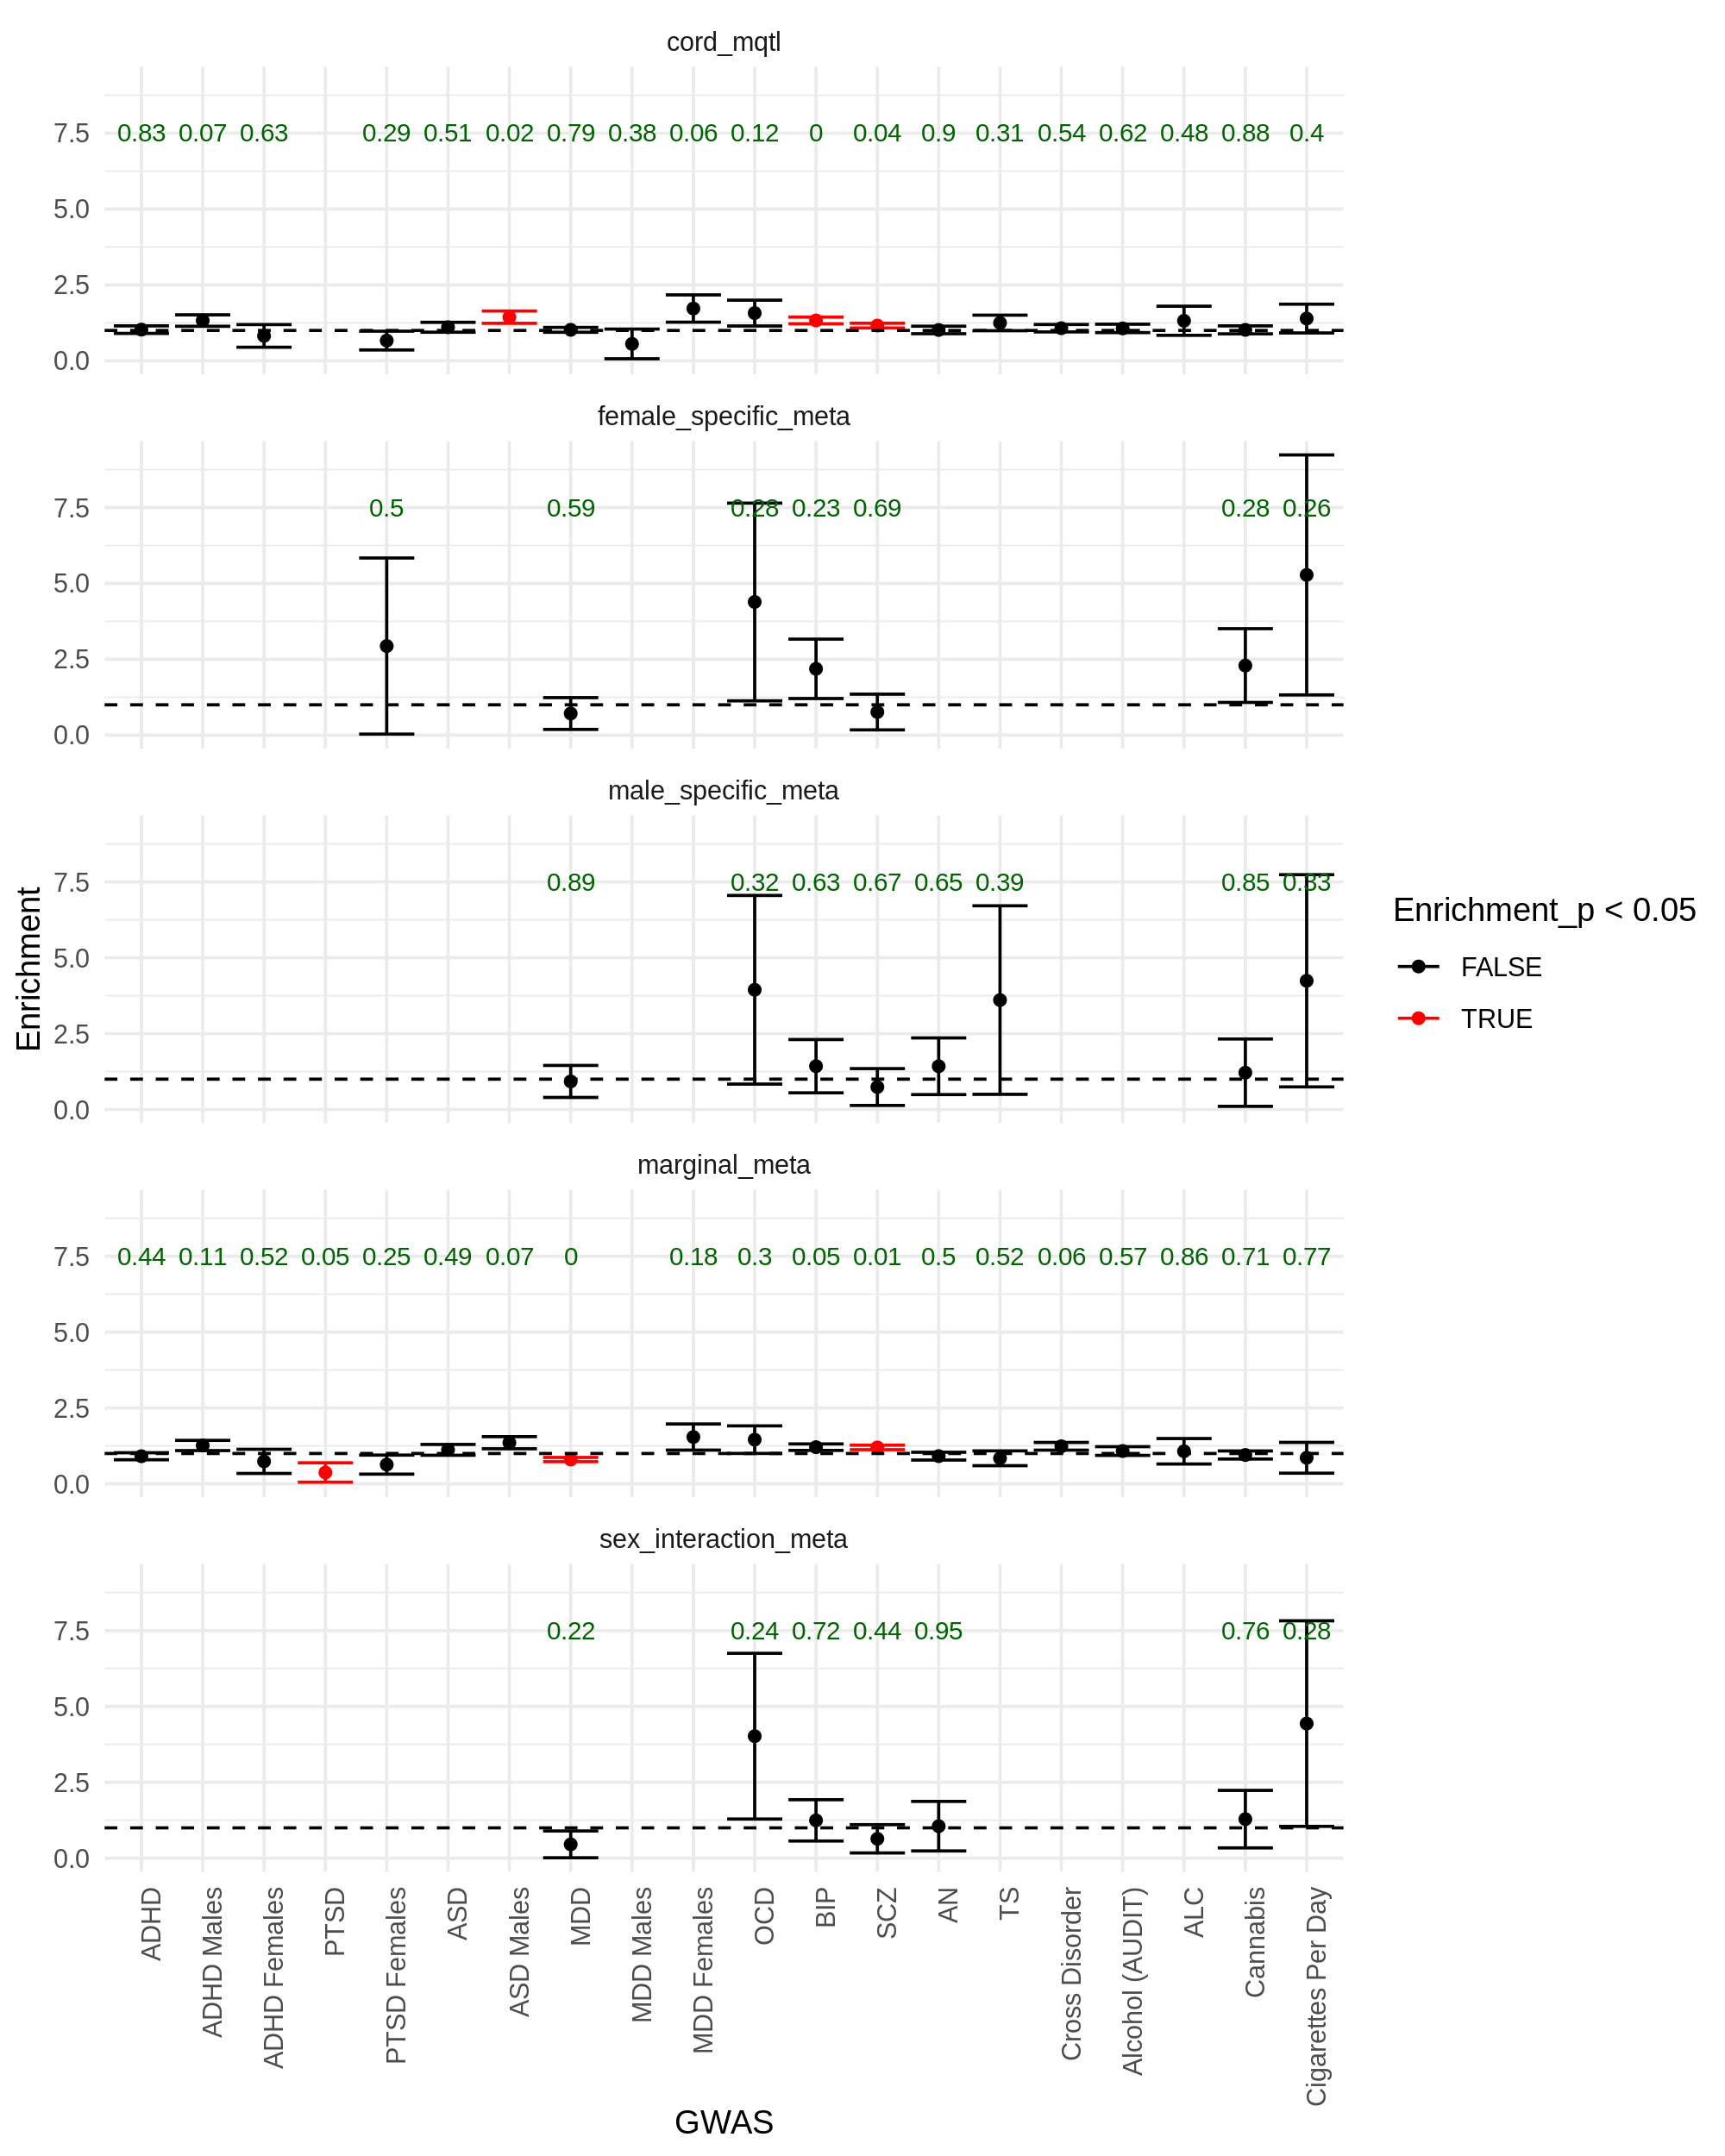

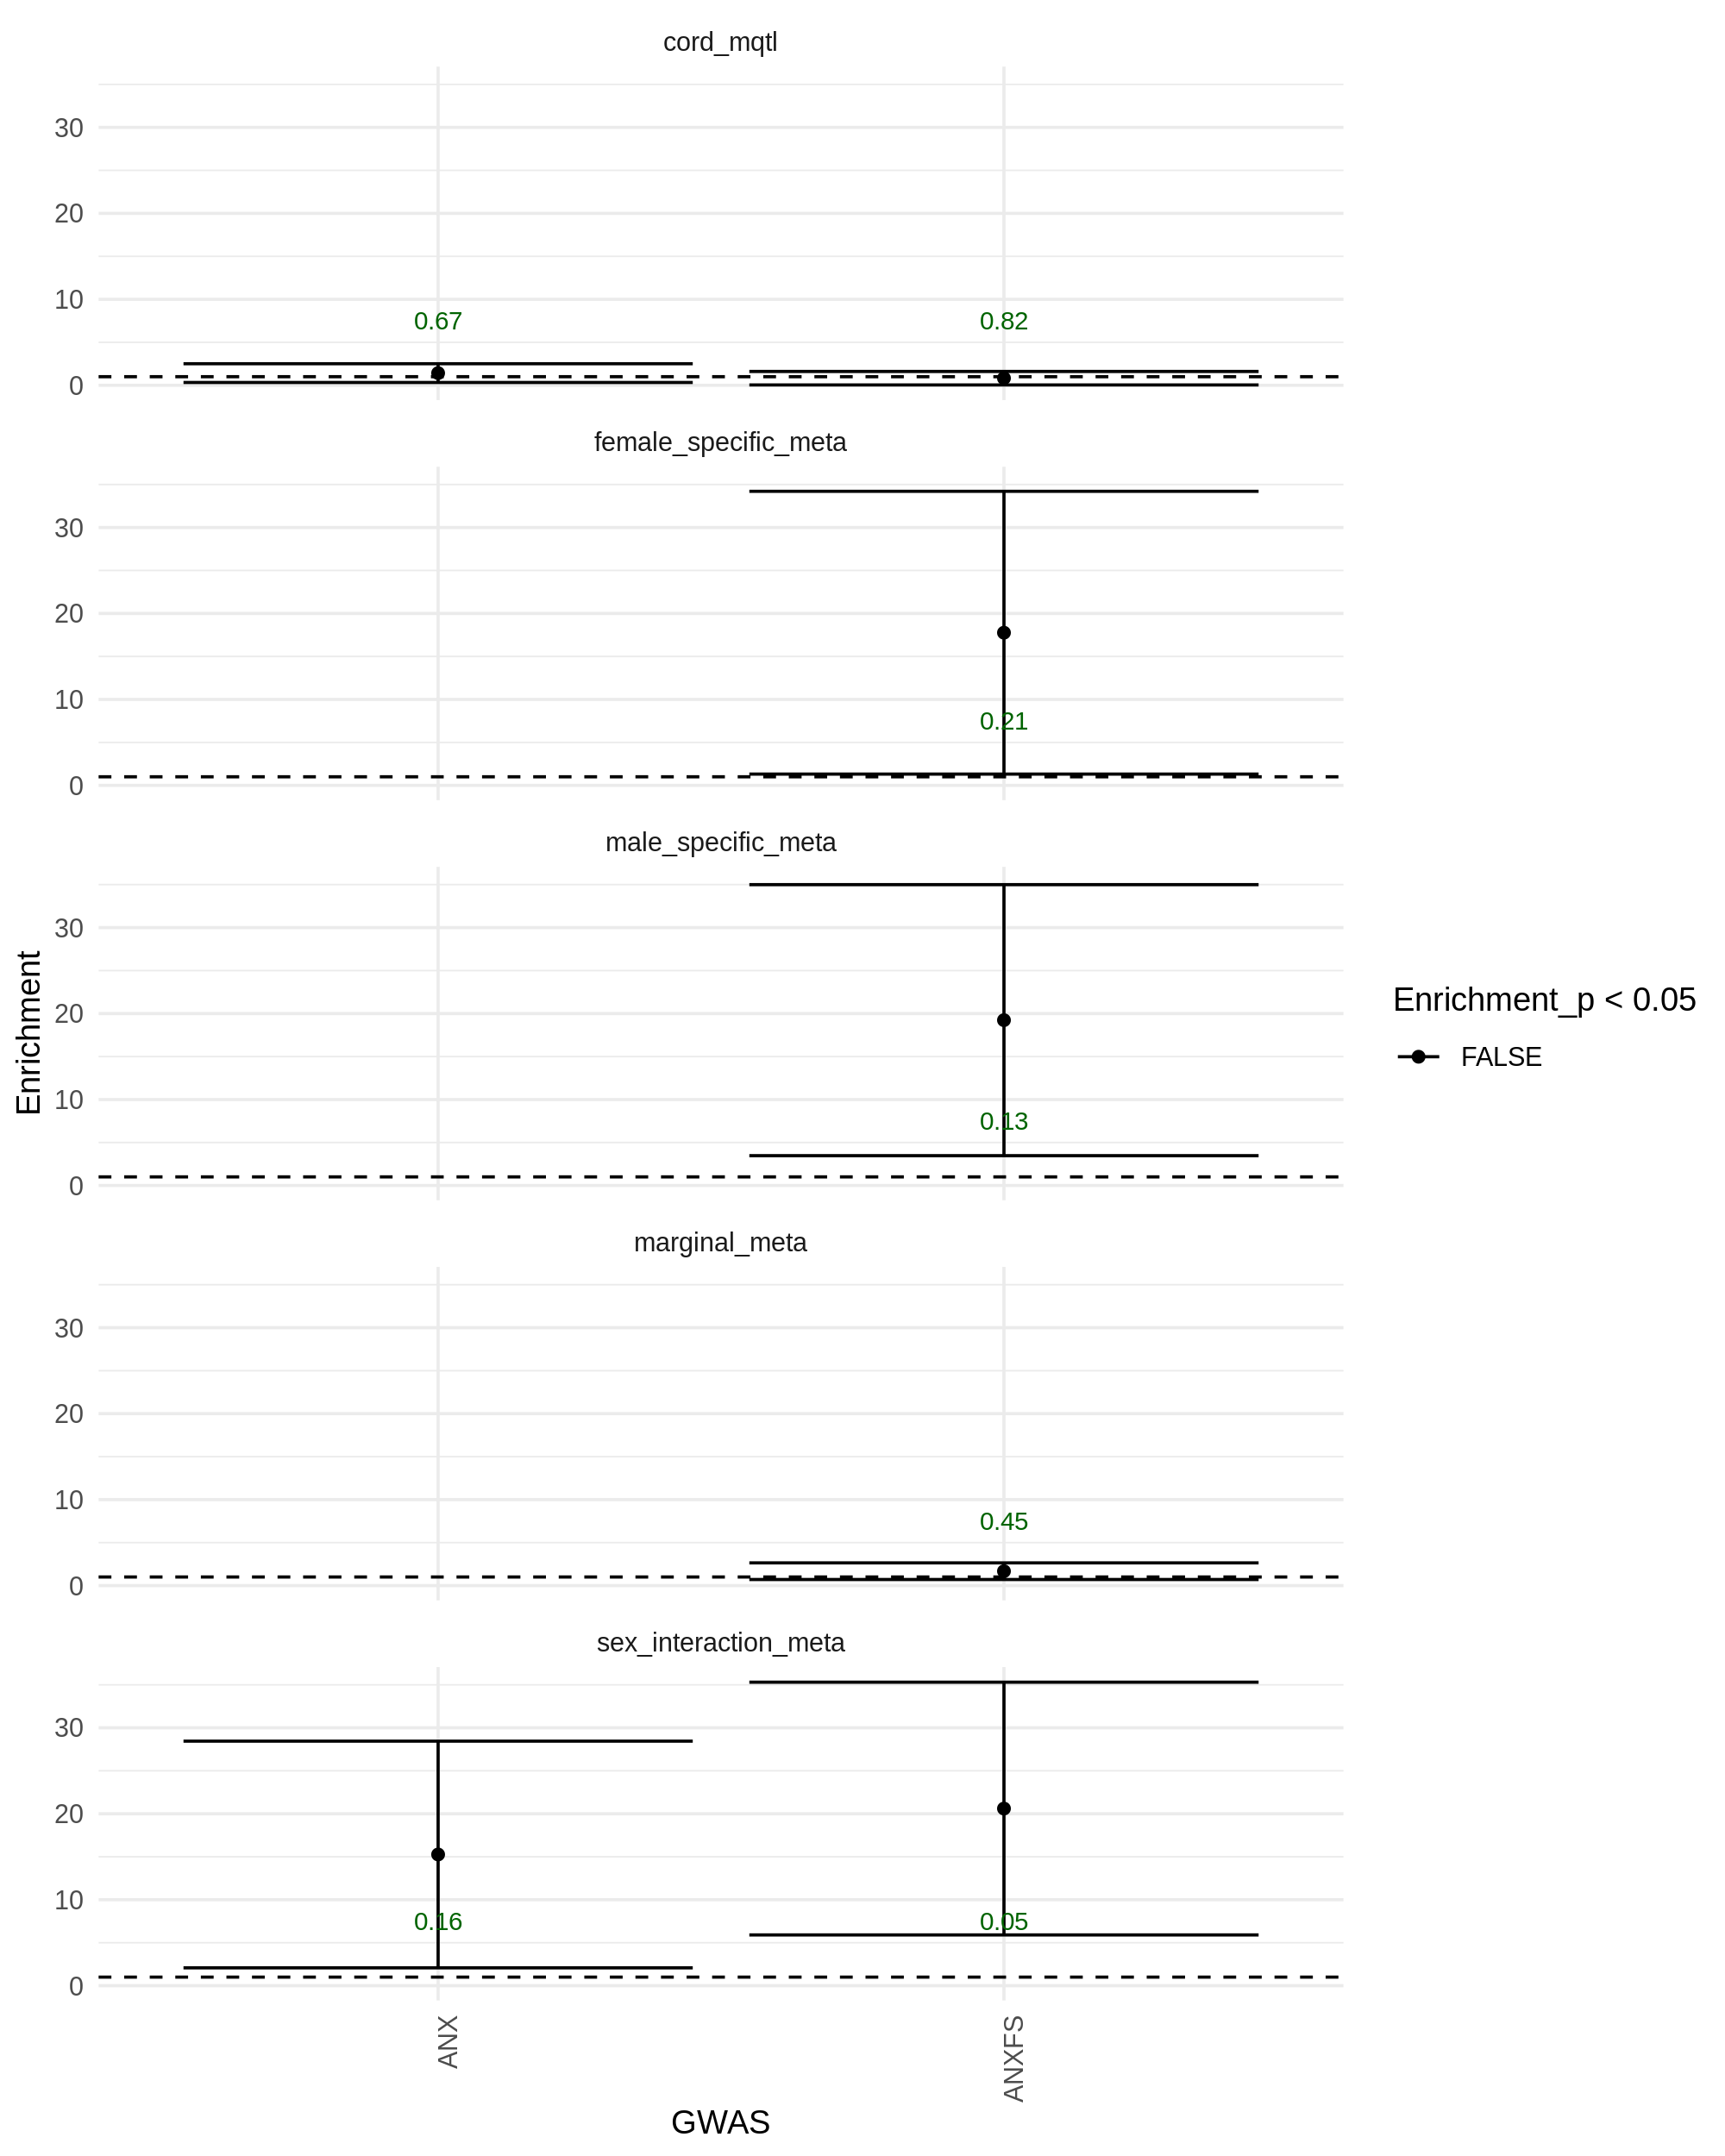

In [16]:
pgc_part_heritability_cis <-  pgc_part_heritability_df %>% filter(annotation == "all_cis")
# plot_enrich(pgc_part_heritability_cis %>% filter(GWAS %in% sex_stratified_set))
# plot_enrich(pgc_part_heritability_cis %>% filter(GWAS %in% compulsive))
# plot_enrich(pgc_part_heritability_cis %>% filter(GWAS %in% psychotic))
# plot_enrich(pgc_part_heritability_cis %>% filter(GWAS %in% neurodevelopmental))
# plot_enrich(pgc_part_heritability_cis %>% filter(GWAS %in% internalizing))
ggplot(pgc_part_heritability_cis %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),!grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=3,color="darkgreen",y=7.5)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

ggplot(pgc_part_heritability_cis %>% filter(grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=3,color="darkgreen",y=7.5)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

## Exploring different annotations
First I'm going to just see which annotations are in the set aside from those mQTL annotations I've generated:

In [11]:
mdd_enrich <- fread("../../delahaye_QC/ldsc_meta_EUR_pgc_results/marginal_meta_all_cis_adhd_jul2017.results")
mdd_enrich %>% mutate(id = row_number()) %>% kable("html") %>% scroll_box(width = "75%", height = "500px") %>% as.character() %>%  display_html()
mdd_enrich %>% mutate(id = row_number()) %>% filter(grepl("fe|DNAm|meth",Category,ignore.case = TRUE)) %>% kable("html") %>% scroll_box(width = "75%", height = "200px") %>% as.character() %>%  display_html()

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score,id
L2_0,0.2715499,0.2471058,0.0313723,0.9099833,0.1155307,0.4385857,0e+00,0e+00,-0.9662970,1
alleleageL2_1,0.8982686,1.0289283,0.0303633,1.1454572,0.0338021,0.0000222,0e+00,0e+00,2.5263225,2
Ancient_Sequence_Age_Human_EnhancerL2_1,0.0051399,0.0383050,0.0310019,7.4524230,6.0315710,0.2874142,1e-07,3e-07,0.4512822,3
Ancient_Sequence_Age_Human_Enhancer.extend.500L2_1,0.0141649,0.0400758,0.0239307,2.8292379,1.6894414,0.2838467,0e+00,1e-07,0.3454830,4
Ancient_Sequence_Age_Human_PromoterL2_1,0.0041735,0.0198418,0.0279818,4.7542178,6.7046176,0.5752557,0e+00,4e-07,-0.0639903,5
Ancient_Sequence_Age_Human_Promoter.extend.500L2_1,0.0094911,0.0356231,0.0282478,3.7533163,2.9762408,0.3486400,0e+00,2e-07,0.1362728,6
Backgrd_Selection_StatL2_1,0.9981598,0.9972009,0.0036935,0.9990393,0.0037003,0.7948427,0e+00,1e-07,-0.5159604,7
BivFlnkL2_1,0.0135494,0.1127919,0.0441214,8.3245047,3.2563420,0.0246034,3e-07,2e-07,1.8904178,8
BivFlnk.extend.500L2_1,0.0311793,0.1066693,0.0347289,3.4211544,1.1138433,0.0316228,0e+00,1e-07,-0.2982404,9
BLUEPRINT_FE_META_TISSUE_DNAMETH_MaxCPPL2_1,0.1854827,0.2814839,0.0441761,1.5175750,0.2381680,0.0349049,0e+00,0e+00,1.1968278,10


Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score,id
BLUEPRINT_FE_META_TISSUE_DNAMETH_MaxCPPL2_1,0.1854827,0.2814839,0.0441761,1.517575,0.2381680,0.0349049,0e+00,0e+00,1.1968278,10
BLUEPRINT_FE_META_TISSUE_H3K27ac_MaxCPPL2_1,0.1077140,0.1344982,0.0318728,1.248661,0.2959021,0.4000973,0e+00,0e+00,-0.1993584,11
BLUEPRINT_FE_META_TISSUE_H3K4me1_MaxCPPL2_1,0.0979575,0.1425211,0.0307358,1.454929,0.3137672,0.1391308,0e+00,0e+00,0.7225109,12
FetalDHS_TrynkaL2_1,0.0836829,0.2114673,0.1170017,2.527008,1.3981557,0.2774161,1e-07,1e-07,1.7530947,34
FetalDHS_Trynka.extend.500L2_1,0.2832003,0.4460733,0.1120126,1.575116,0.3955242,0.1537186,0e+00,0e+00,0.3372280,35
GTEx_FE_META_TISSUE_GE_MaxCPPL2_1,0.0583717,0.1592487,0.0300261,2.728183,0.5143949,0.0007075,1e-07,0e+00,3.4275661,36


### Fetal DHS 
Citation tracked down from [Finucane et al, 2015](https://www-ncbi-nlm-nih-gov.ezproxy.library.ubc.ca/pmc/articles/PMC4626285/) paper was [Trynka et al, 2013](https://www-ncbi-nlm-nih-gov.ezproxy.library.ubc.ca/pmc/articles/PMC3826950/)

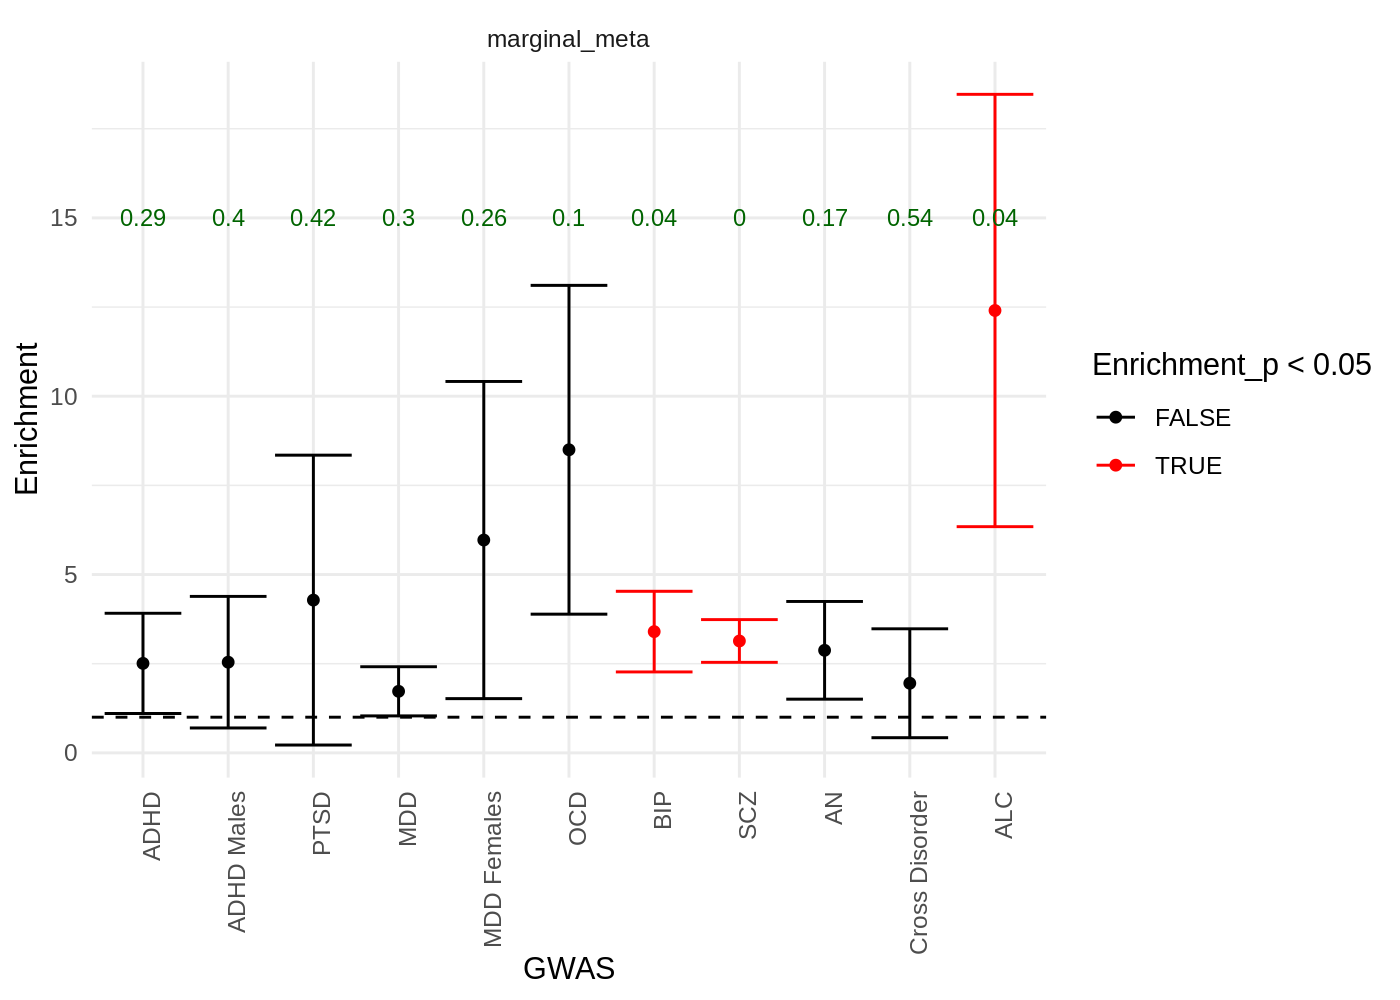

In [17]:
options(repr.plot.width= 7, repr.plot.height= 5, repr.plot.res = 200)

pgc_part_heritability_fetal <- rbindlist(part_heritability_results("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_pgc_results/",34)) %>% mutate(
        significant_coef = Coefficient_p < 0.05, 
        significant_enrich = Enrichment_p < 0.05,
        GWAS = recode(GWAS, !!!pgc_GWAS_key)
    ) %>%
    mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key))

pgc_part_heritability_fetal_bin <-  pgc_part_heritability_fetal %>% filter(annotation == "bin_CPP")


ggplot(pgc_part_heritability_fetal_bin %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),!grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0, mQTL_group == "marginal_meta"), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=3,color="darkgreen",y=15)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))




# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set,!GWAS %in% c("ASD Females","PTSD Males")))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% compulsive))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% psychotic))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% neurodevelopmental))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% internalizing))

# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("cord_mqtl","marginal_meta","sex_interaction_meta")))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("male_specific_meta","female_specific_meta","sex_interaction_meta")))

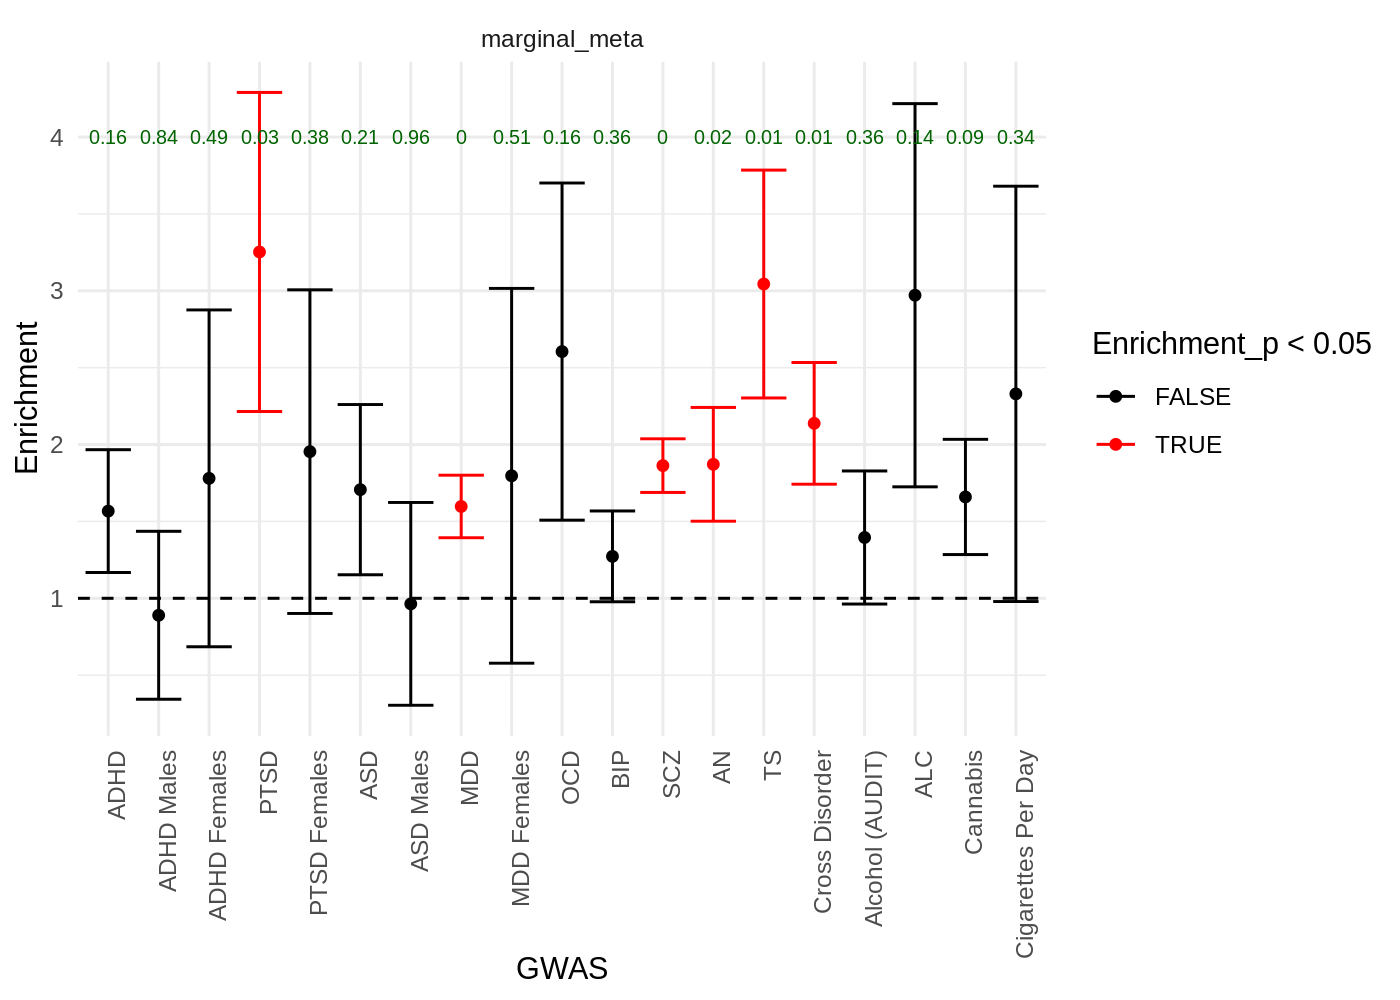

In [19]:
options(repr.plot.width= 7, repr.plot.height= 5, repr.plot.res = 200)

pgc_part_heritability_fetal <- rbindlist(part_heritability_results("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_pgc_results/",35)) %>% mutate( #window +500
        significant_coef = Coefficient_p < 0.05, 
        significant_enrich = Enrichment_p < 0.05,
        GWAS = recode(GWAS, !!!pgc_GWAS_key)
    ) %>%
    mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key))

pgc_part_heritability_fetal_bin <-  pgc_part_heritability_fetal %>% filter(annotation == "bin_CPP")

ggplot(pgc_part_heritability_fetal_bin %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),!grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0, mQTL_group == "marginal_meta"), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=2.5,color="darkgreen",y=4)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set,!GWAS %in% c("ASD Females","PTSD Males")))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% compulsive))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% psychotic))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% neurodevelopmental))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% internalizing))

# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("cord_mqtl","marginal_meta","sex_interaction_meta")))
# plot_enrich(pgc_part_heritability_fetal_bin %>% filter(GWAS %in% sex_stratified_set, mQTL_group %in% c("male_specific_meta","female_specific_meta","sex_interaction_meta")))

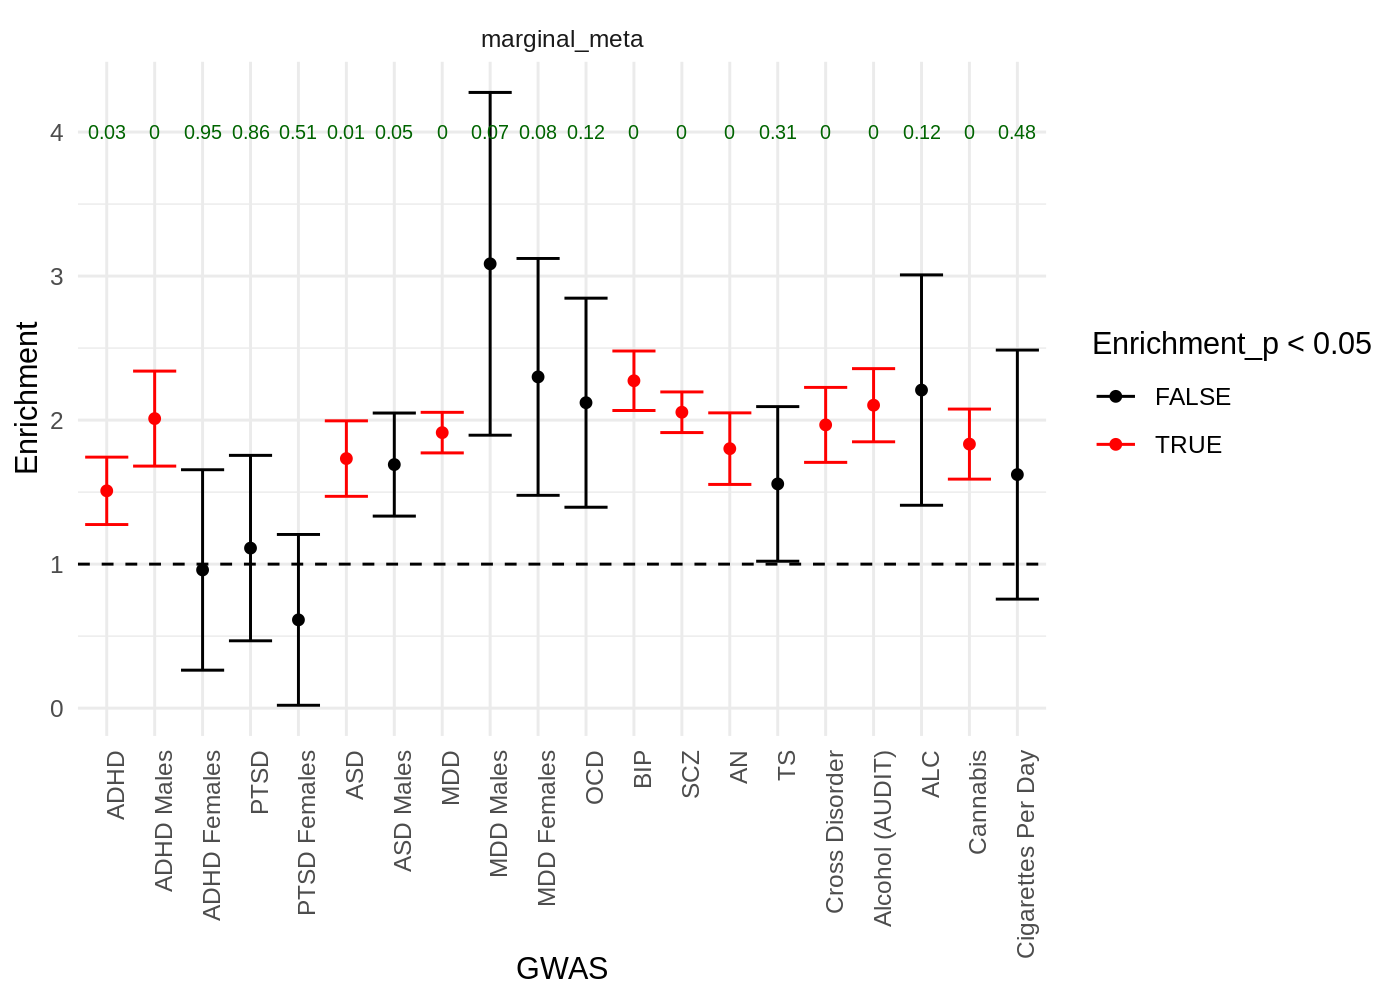

In [21]:
options(repr.plot.width= 7, repr.plot.height= 5, repr.plot.res = 200)

pgc_part_heritability_fetal <- rbindlist(part_heritability_results("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_pgc_results/",10)) %>% mutate( #window +500
        significant_coef = Coefficient_p < 0.05, 
        significant_enrich = Enrichment_p < 0.05,
        GWAS = recode(GWAS, !!!pgc_GWAS_key)
    ) %>%
    mutate(GWAS = factor(GWAS,levels=pgc_GWAS_key))

pgc_part_heritability_dnam_maxCPP <-  pgc_part_heritability_fetal %>% filter(annotation == "bin_CPP")

ggplot(pgc_part_heritability_dnam_maxCPP %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),!grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0, mQTL_group == "marginal_meta"), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=2.5,color="darkgreen",y=4)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

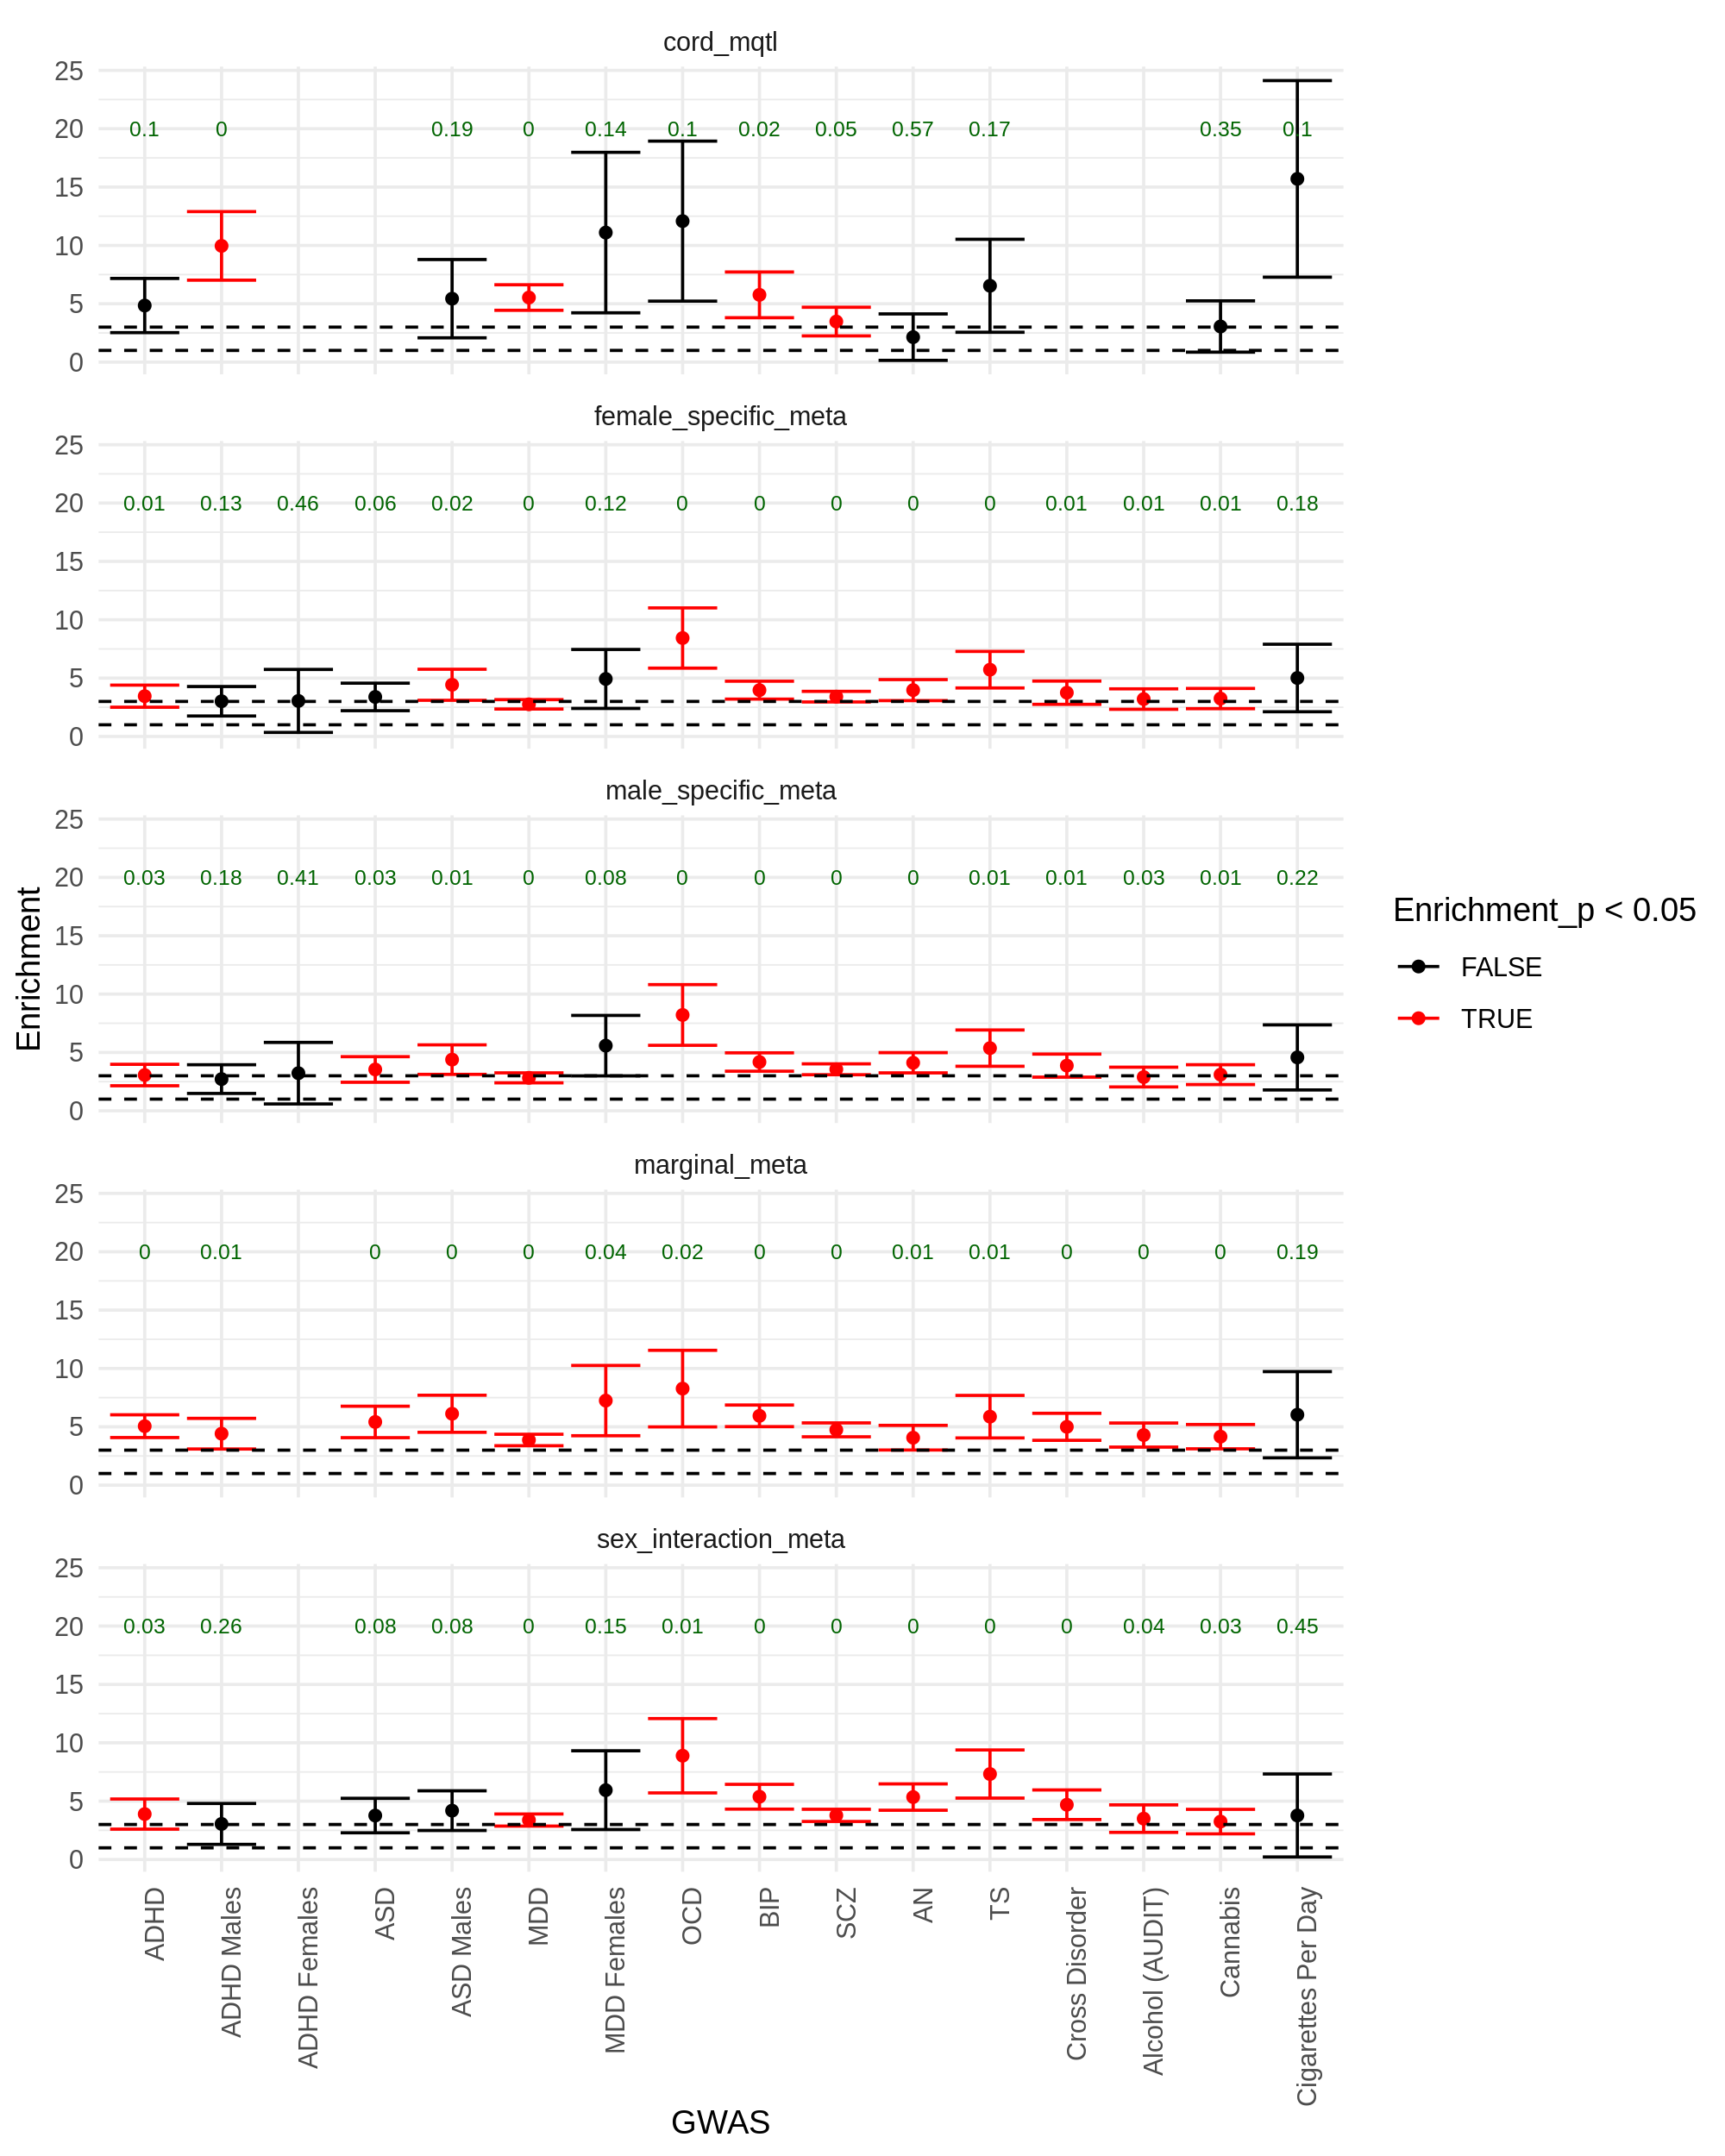

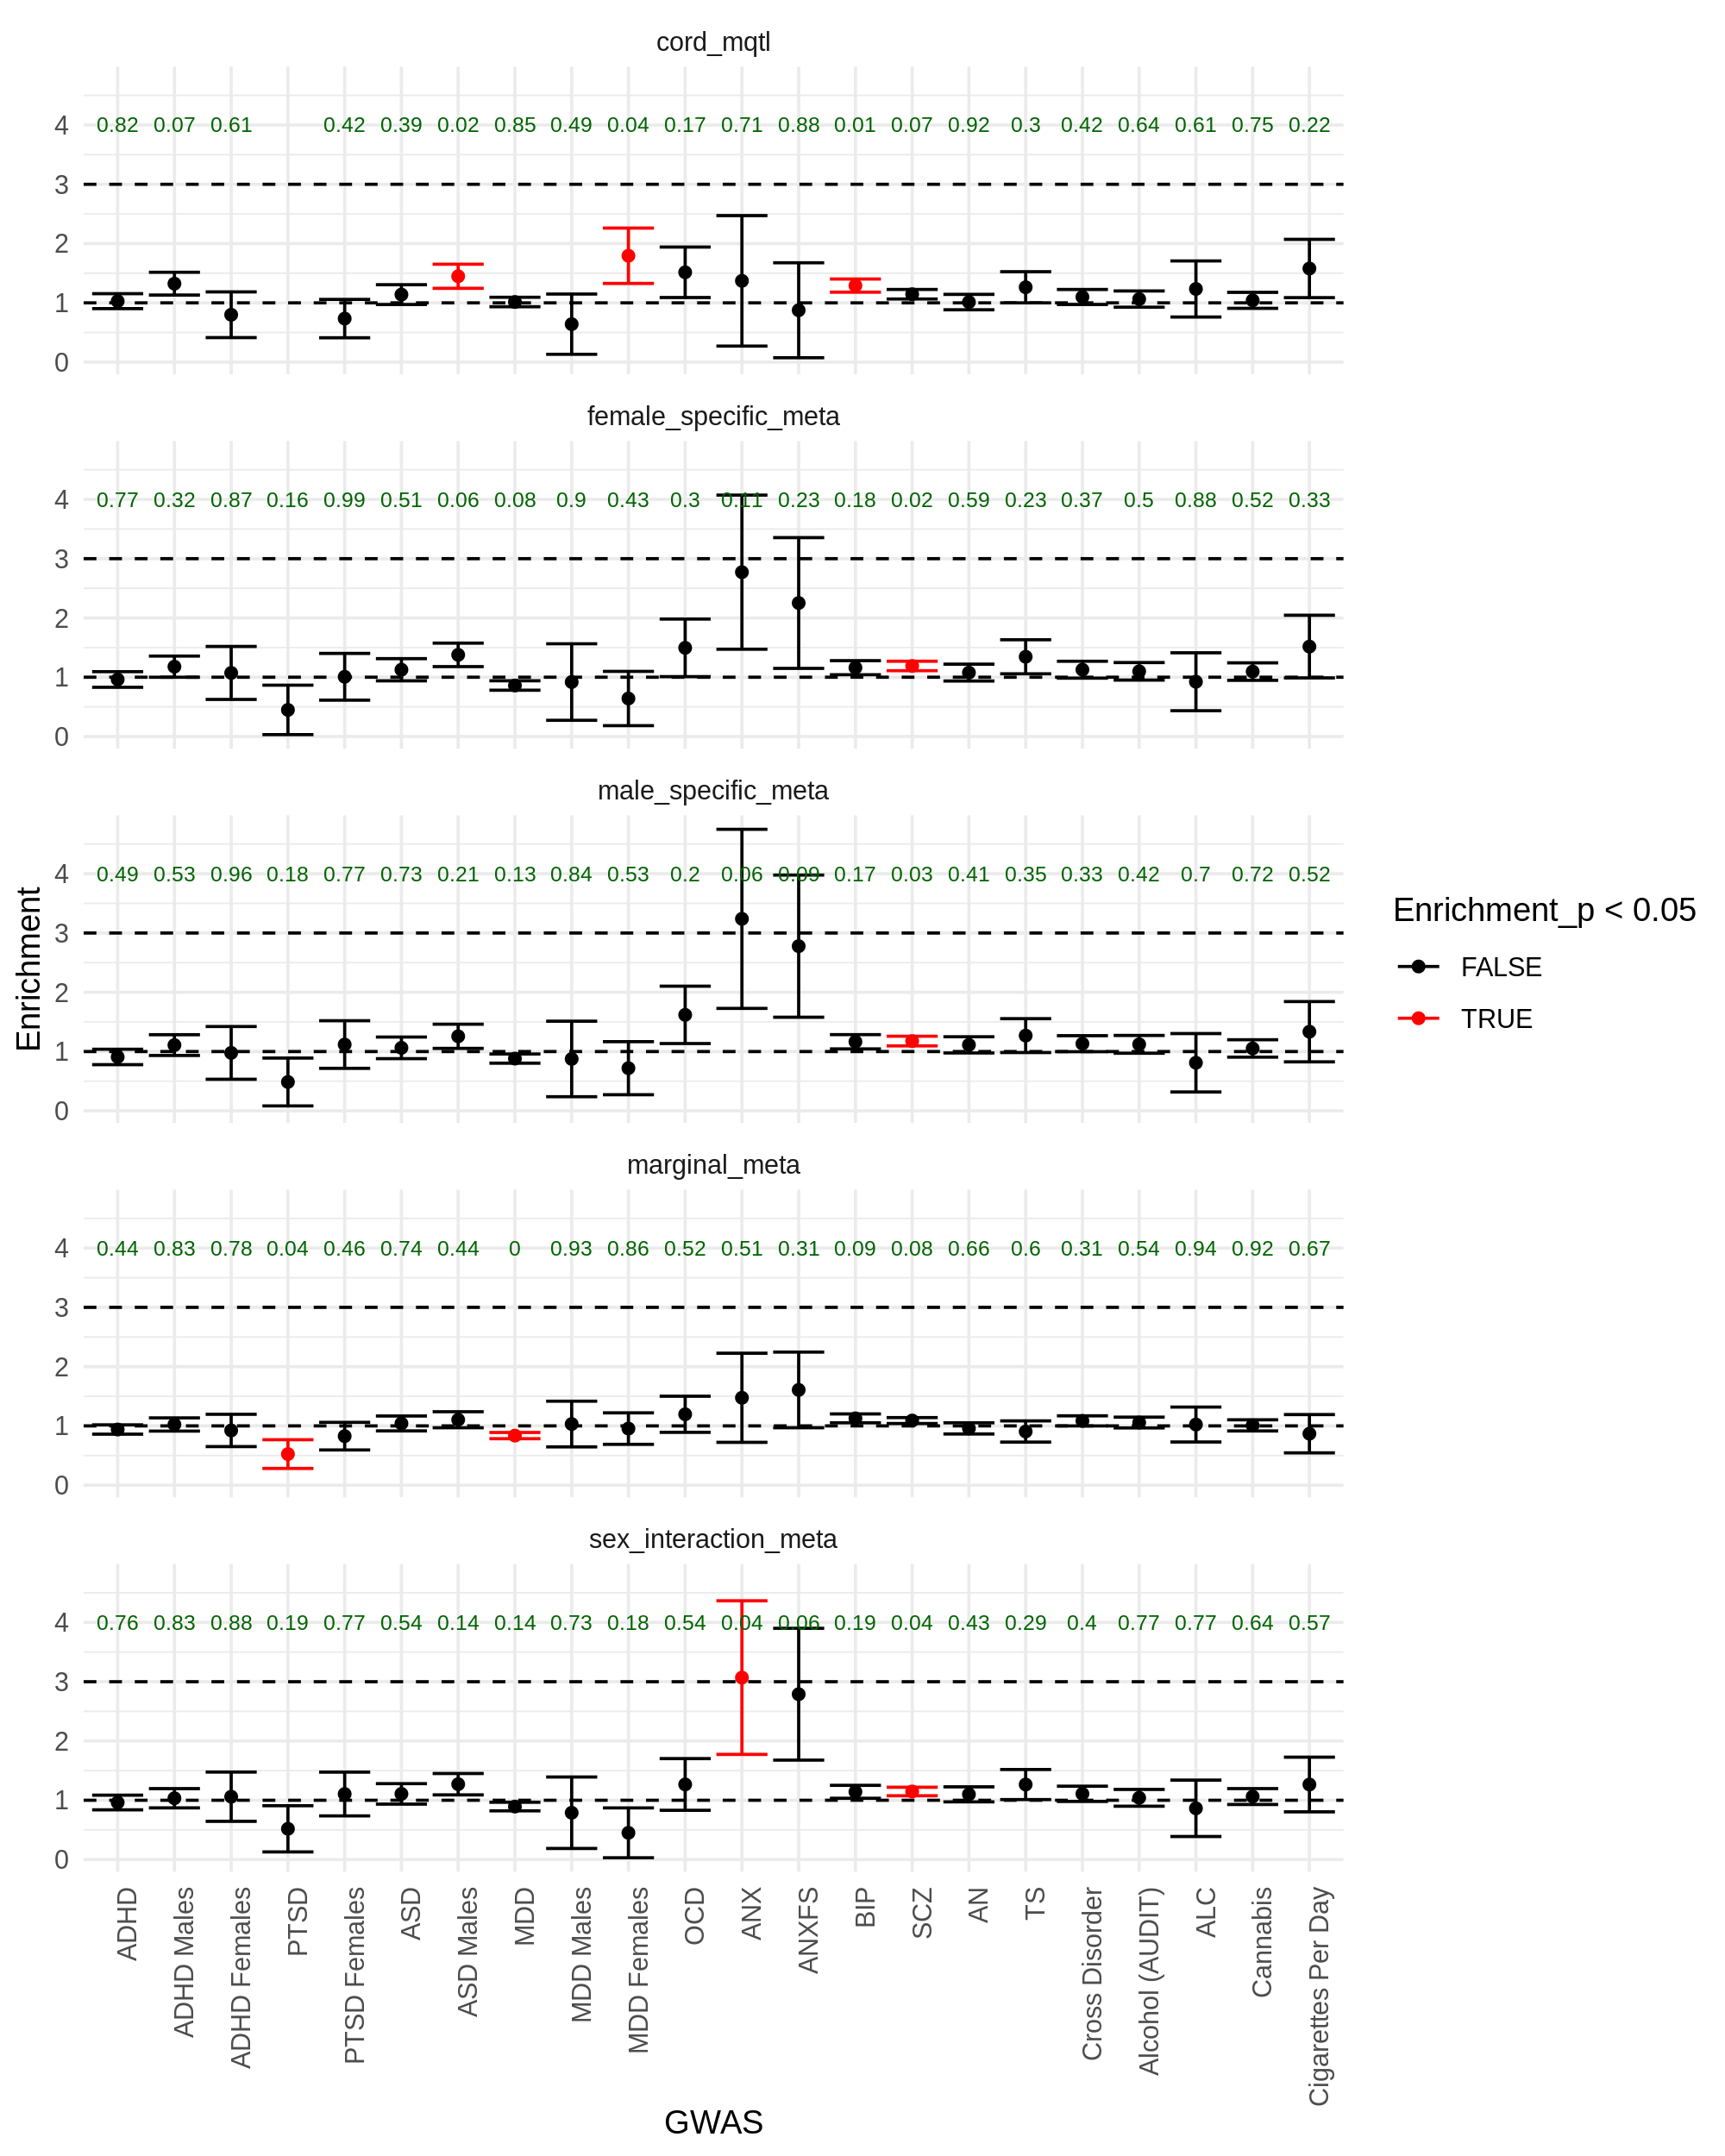

In [24]:
options(repr.plot.width=8,repr.plot.height=10,repr.plot.res=250)

ggplot(pgc_part_heritability_max %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),!grepl("ANX",GWAS),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    geom_hline(linetype="dashed",yintercept=3)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=2.5,color="darkgreen",y=20)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))

ggplot(pgc_part_heritability_bin %>% filter(!GWAS %in% c("PTSD Males","ASD Females"),Prop._h2 - Prop._h2_std_error > 0), aes(GWAS,Enrichment,ymin = Enrichment - Enrichment_std_error, ymax = Enrichment+Enrichment_std_error,color = Enrichment_p < 0.05 )) +
    geom_point() + 
    geom_errorbar()+
    geom_hline(linetype="dashed",yintercept=1)+
    geom_hline(linetype="dashed",yintercept=3)+
    scale_color_manual(values=c("black","red")) +
    geom_text(aes(label=round(Enrichment_p,2)),size=2.5,color="darkgreen",y=4)+
    facet_wrap(~mQTL_group,ncol=1)+
    theme_minimal()+
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=1))